# Farhan Mohammed Abdul Qadir 201771950


# Socio-Economic and Industrial Based Forecasting of Greenhouse Gas Emissions in the Middle East

In [ ]:
from datetime import datetime
from functools import reduce
from math import sqrt
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
# from pydotplus import graphviz
# import shap
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn import tree
from sklearn.tree import export_graphviz
from io import StringIO
# import pydotplus
import seaborn as sns
# from dtreeviz.trees import dtreeviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor, plot_importance 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Dataset


This dataset was extracted from the World Development Index Indicators statistics curated by the World Bank. The original dataset had millions of rows and columns and the majority of my time was spent in extracting the data I required in the format I wanted. This was only possible through manual means.
The initial ones that I considered are shown below. I chose the final ones based on numerous research papers that I read.

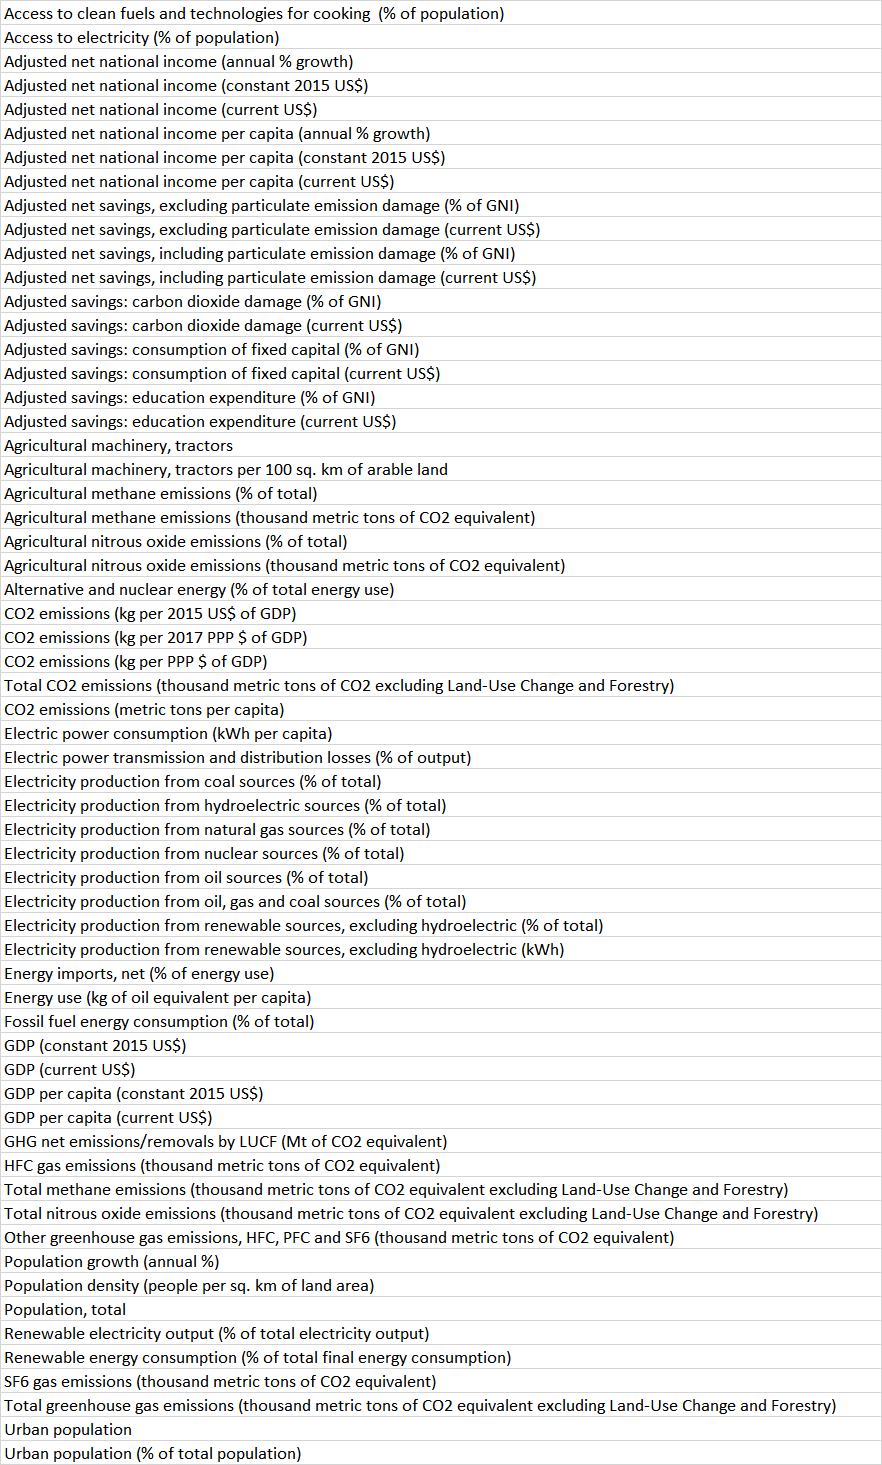

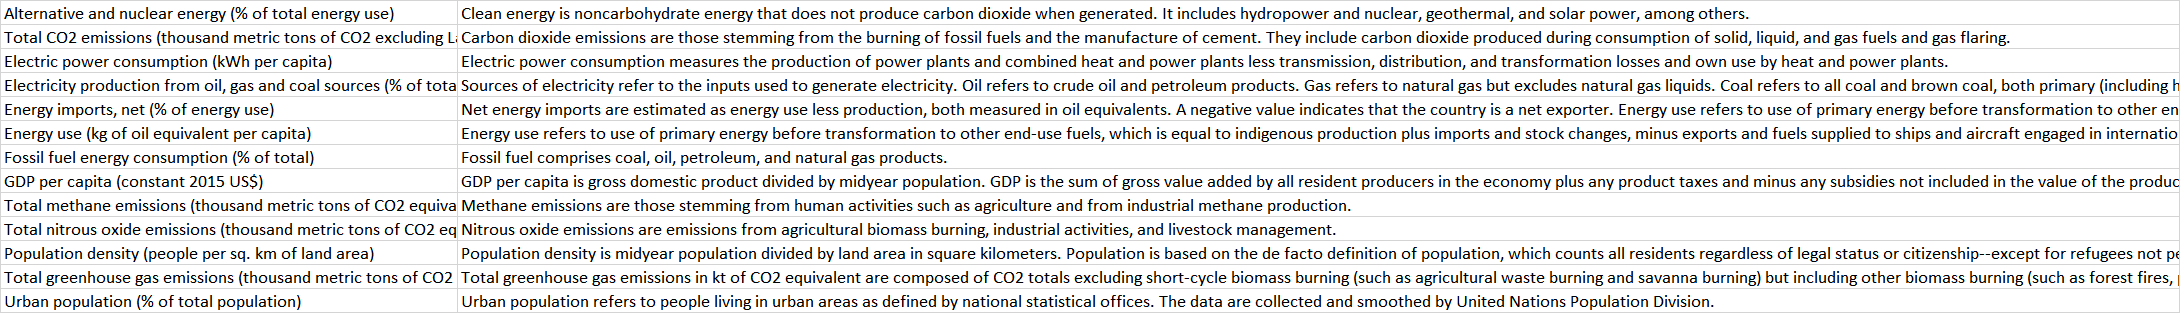

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_excel("/MEData.xlsx", sheet_name="MEData")
print(df)

df.replace("..", np.NaN, inplace=True)
yvals = list(df)
yvals.remove("Year")
yvals.remove("Country")
onefolder = 2

     Year  Country Alternative and nuclear energy (% of total energy use) Electric power consumption (kWh per capita) Electricity production from oil, gas and coal sources (% of total) Energy imports, net (% of energy use) Energy use (kg of oil equivalent per capita) Fossil fuel energy consumption (% of total) GDP per capita (constant 2015 US$) Population density (people per sq. km of land area)  Urban population (% of total population) CO2 emissions (kt) Methane emissions (kt of CO2 equivalent) Nitrous oxide emissions (thousand metric tons of CO2 equivalent) Total greenhouse gas emissions (kt of CO2 equivalent)
0    1960  Bahrain                                                  0                                              ..                                                100                                                    ..                                           ..                                          ..                                 ..                                  

In [ ]:
df.to_csv('\{onefolder}.csv', sep=',', header=None, index=None)

#Statistics


In [ ]:
df.describe()

Year  Alternative and nuclear energy (% of total energy use)  Electric power consumption (kWh per capita)  Electricity production from oil, gas and coal sources (% of total)  Energy imports, net (% of energy use)  Energy use (kg of oil equivalent per capita)  Fossil fuel energy consumption (% of total)  GDP per capita (constant 2015 US$)  Population density (people per sq. km of land area)  Urban population (% of total population)  CO2 emissions (kt)  Methane emissions (kt of CO2 equivalent)  Nitrous oxide emissions (thousand metric tons of CO2 equivalent)  Total greenhouse gas emissions (kt of CO2 equivalent)
count   610.000000                                         451.000000                                        437.000000                                         461.000000                                              440.000000                                    437.000000                                   440.000000                          448.000000                                         597.000000                                  610.000000          586.000000                                490.000000                                         490.000000                                                        483.000000    
mean   1990.000000                                           0.634879                                       5542.086412                                          91.367677                                             -709.603108                                   5372.869635                                    98.239765                        18783.783091                                         160.647807                                   71.892828        83732.034427                              23052.389033                                        5439.535372                                                     129505.632498    
std      17.621266                                           1.189351                                       5816.999158                                          14.186233                                             1713.612532                                   5142.718813                                     2.998158                        21250.237070                                         318.257677                                   19.699162       120691.107185                              29084.287405                                        8804.005325                                                     163225.951563    
min    1960.000000                                           0.000000                                         14.686876                                          33.180528                                           -17632.766113                                    112.053942                                    85.961175                          762.134113                                           1.419333                                   16.400000           11.001000                                545.394000                                          13.417296                                                       3808.819296    
25%    1975.000000                                           0.000000                                       1096.176368                                          86.997967                                             -548.752270                                    988.997213                                    98.060355                         3671.358605                                          14.924148                                   56.918500        13148.028500                               3890.000000                                         349.471700                                                      26095.000000    
50%    1990.000000                                           0.000000                                       2729.467906                                         100.000000                                             -305.60

#Line plots of features and targets of all countries of which KSA and Oman are showed here.

Alternative and nuclear energy (% of total energy use)


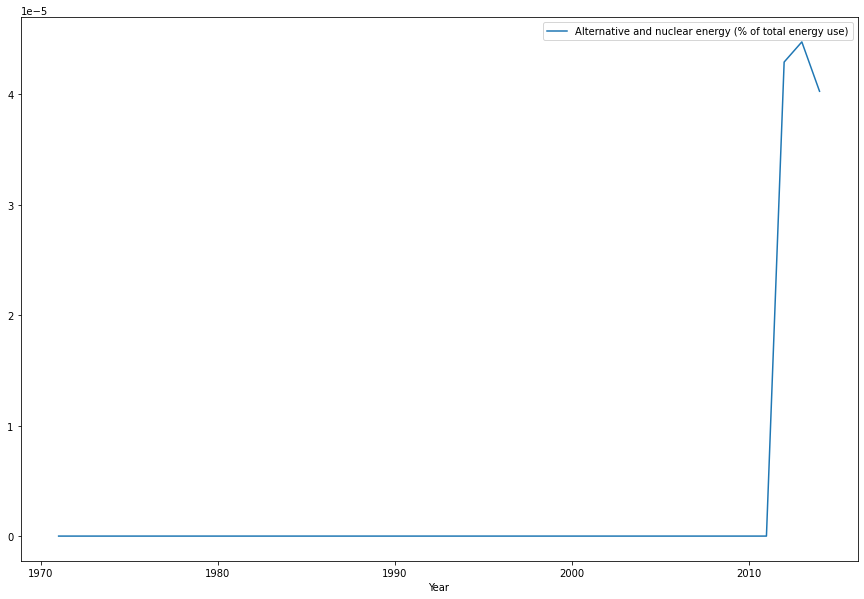

Electric power consumption (kWh per capita)


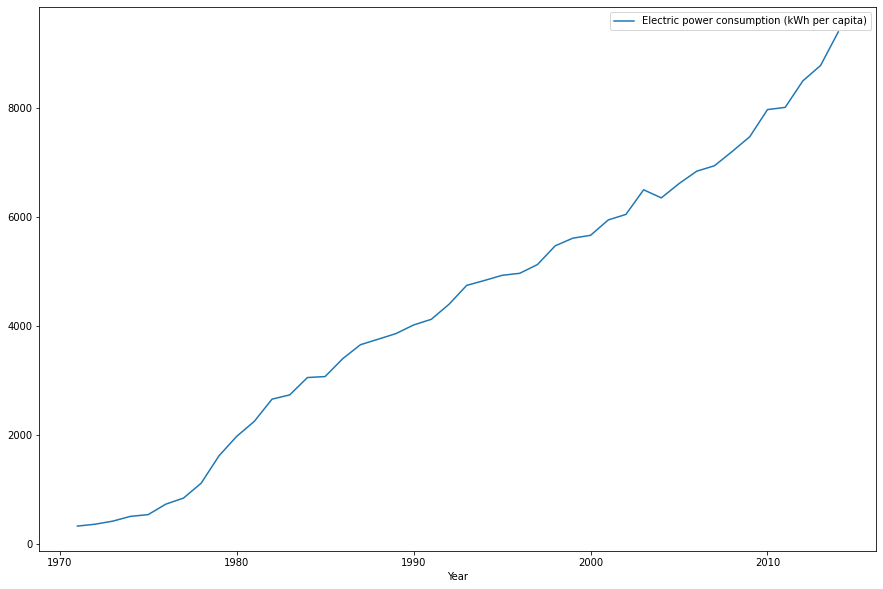

Electricity production from oil, gas and coal sources (% of total)


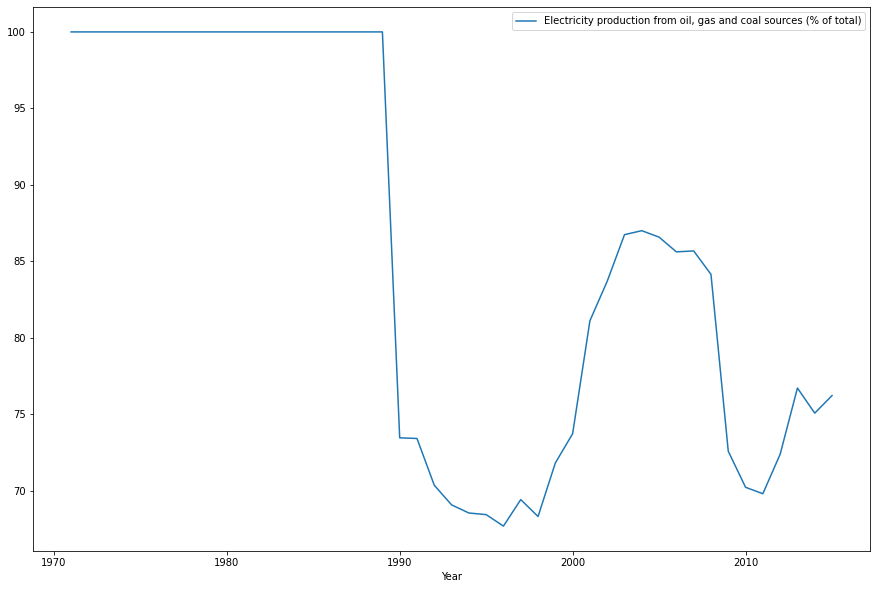

Energy imports, net (% of energy use)


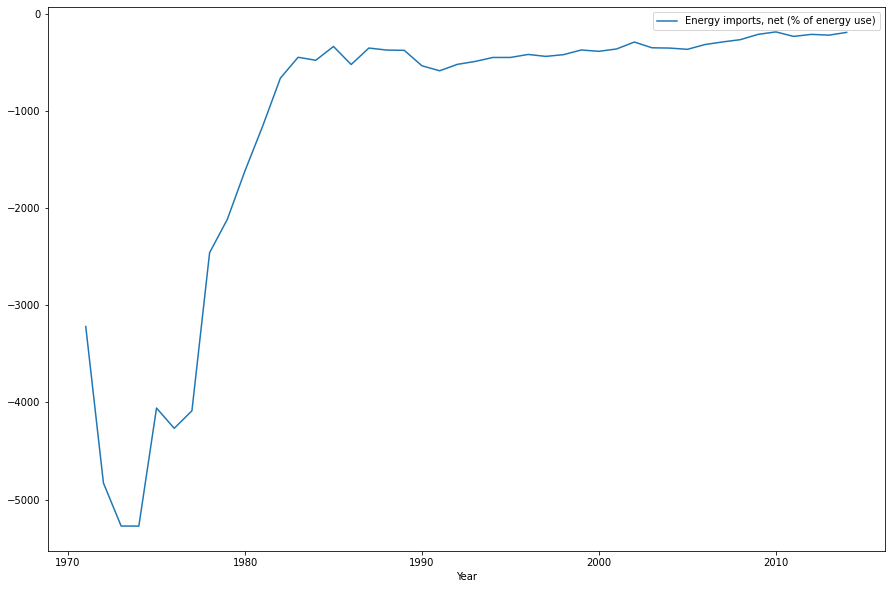

Energy use (kg of oil equivalent per capita)


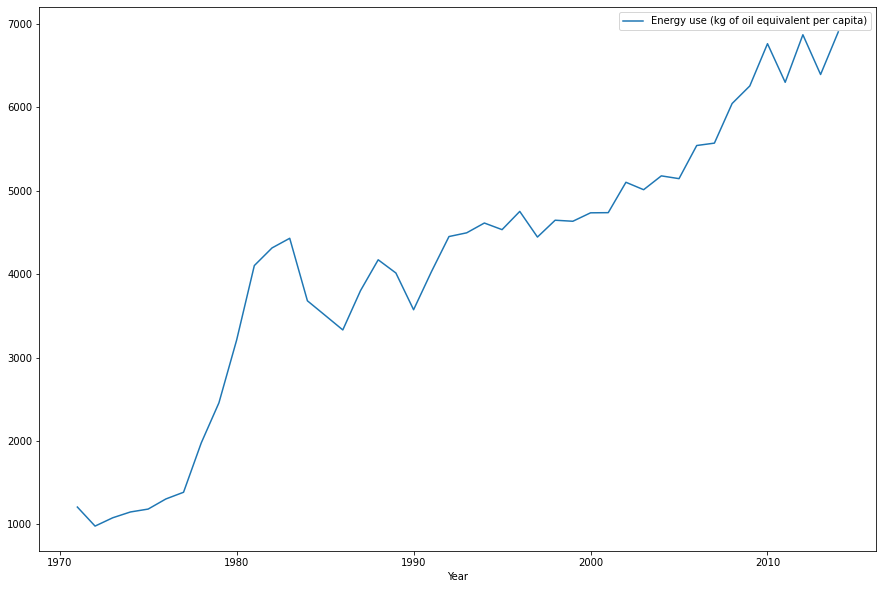

Fossil fuel energy consumption (% of total)


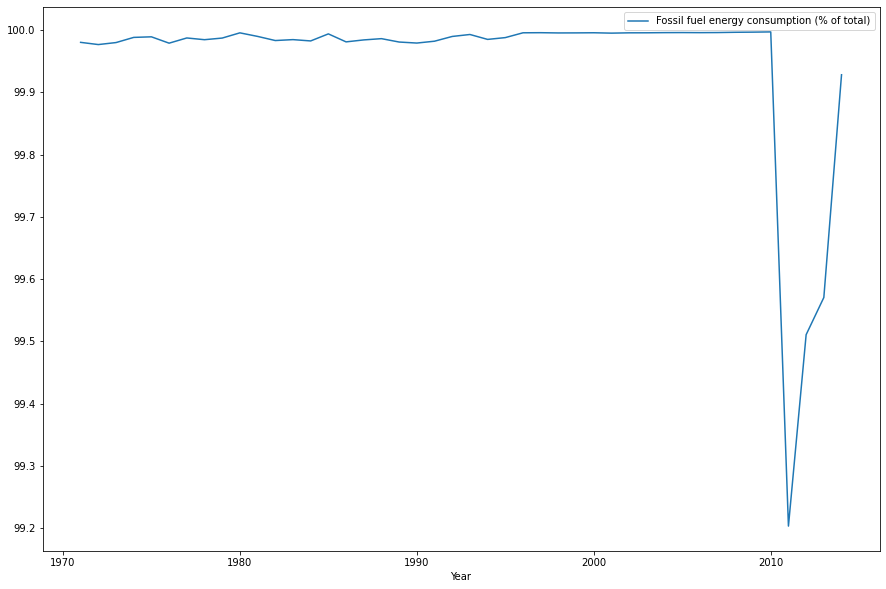

GDP per capita (constant 2015 US$)


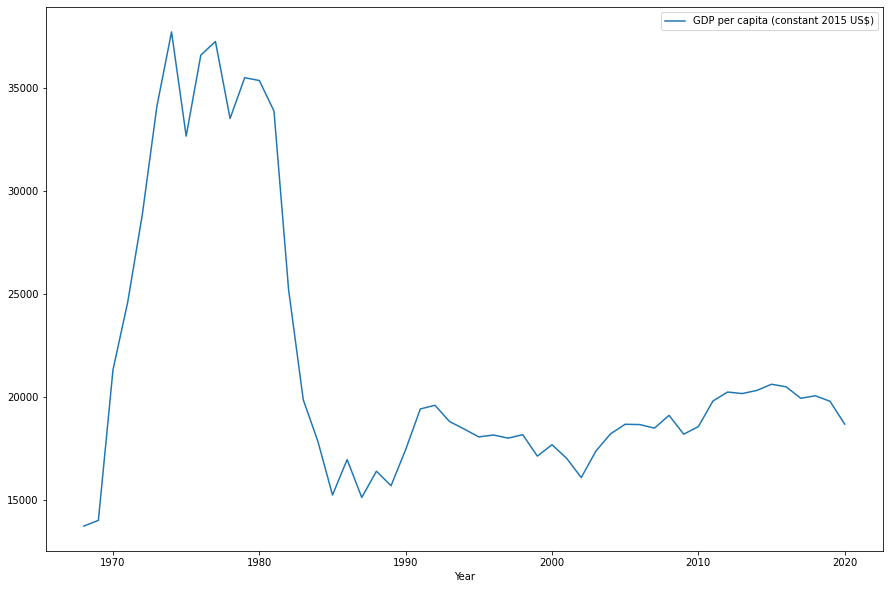

Population density (people per sq. km of land area)


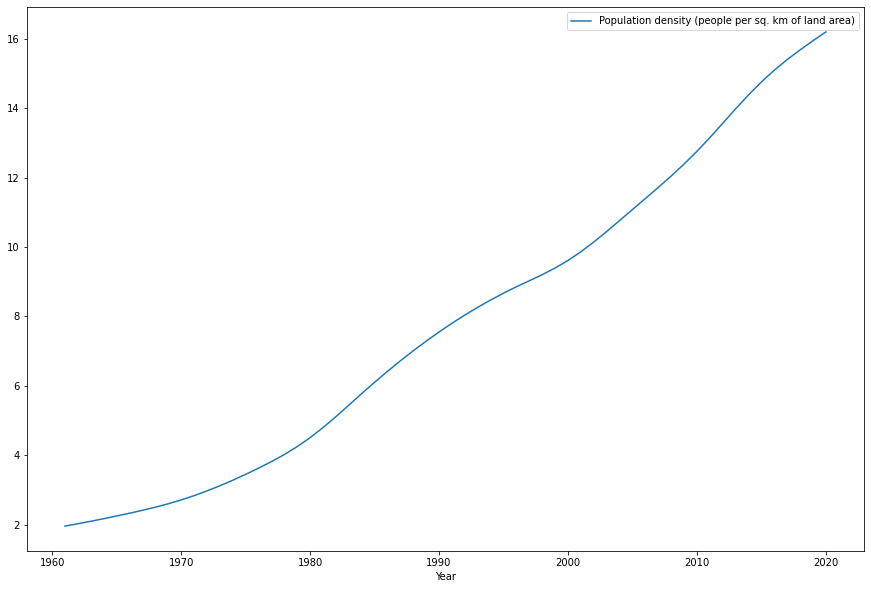

Urban population (% of total population)


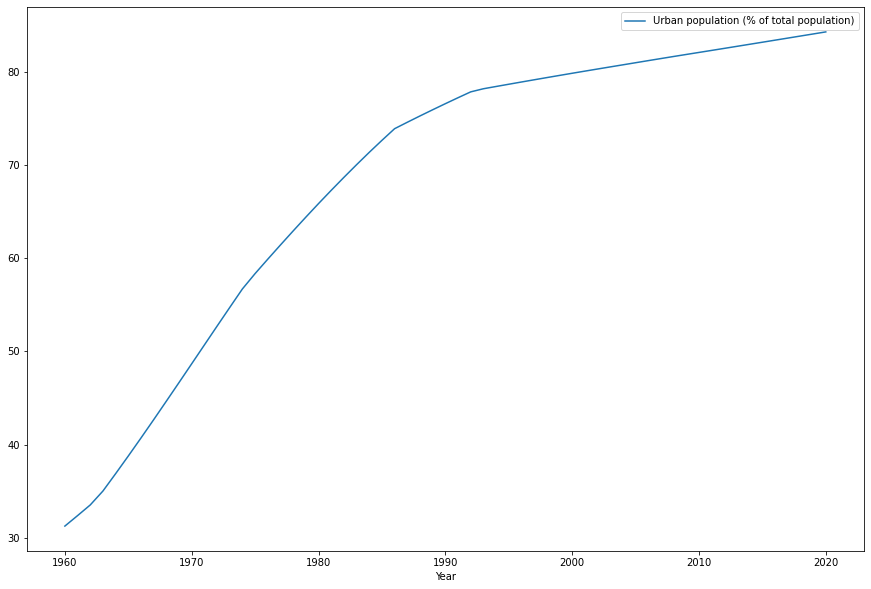

CO2 emissions (kt)


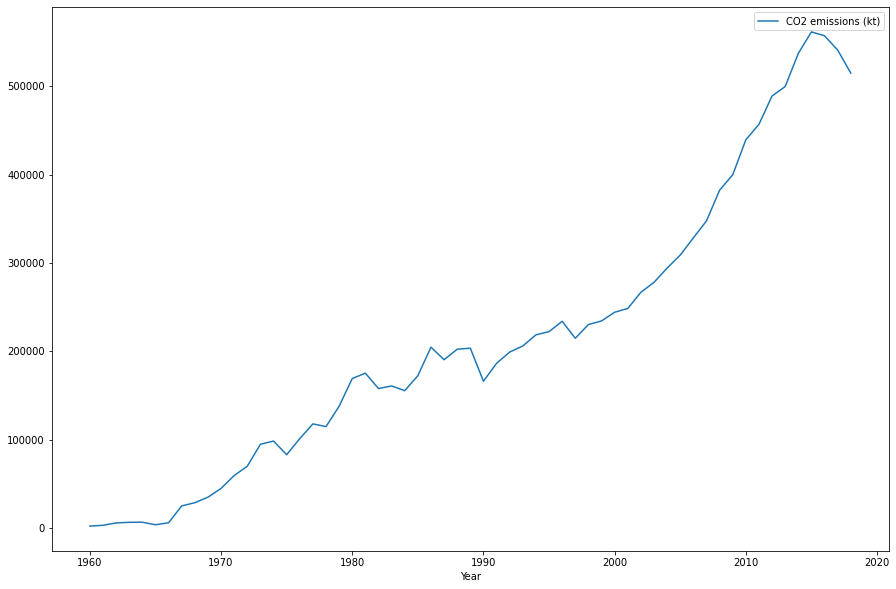

Methane emissions (kt of CO2 equivalent)


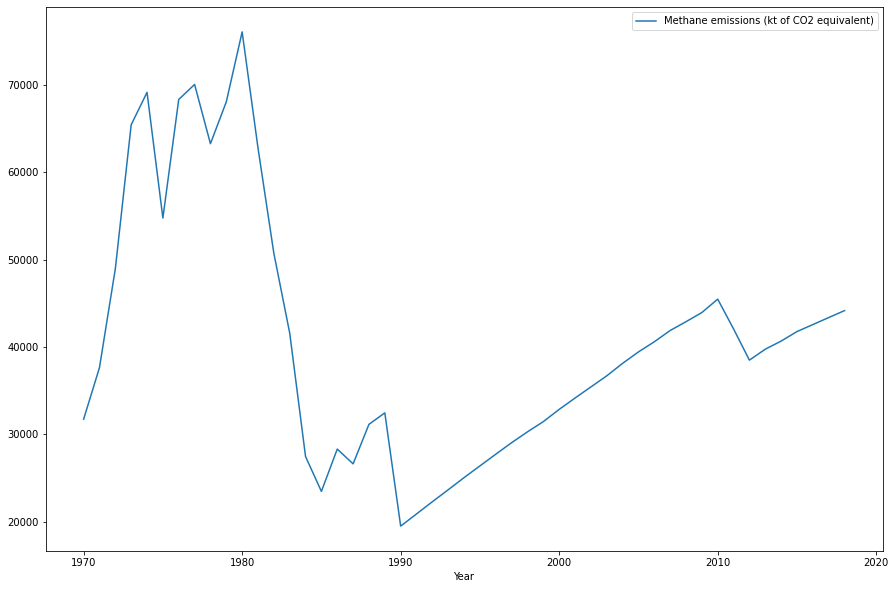

Nitrous oxide emissions (thousand metric tons of CO2 equivalent)


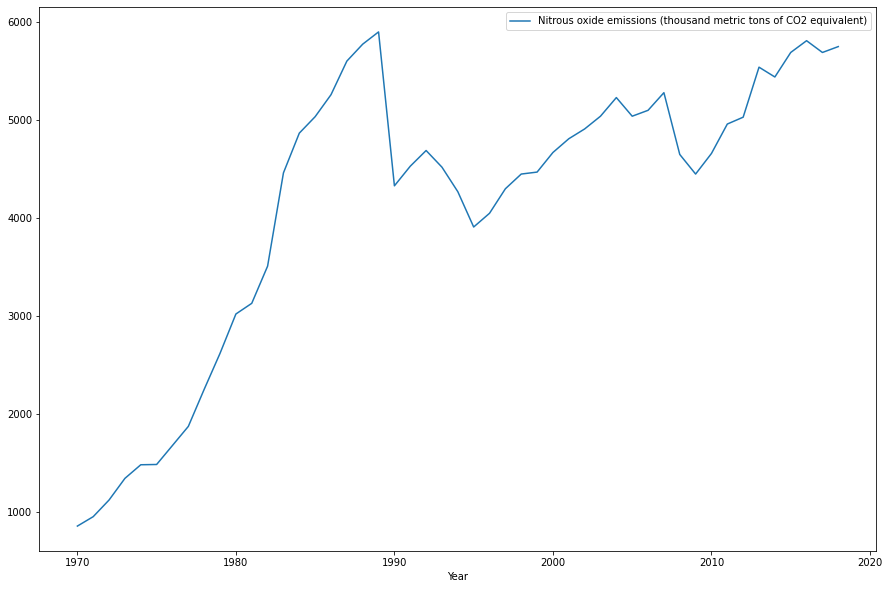

Total greenhouse gas emissions (kt of CO2 equivalent)


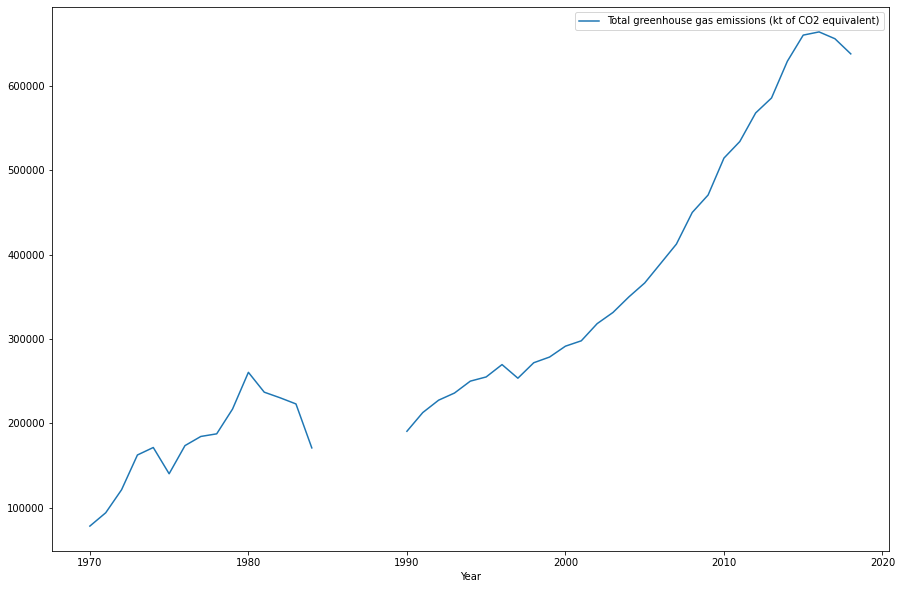

In [ ]:
dfKSA = df.loc[df['Country'] == "KSA"]
for yval in yvals:
  print(yval)
  dfKSA.plot(y=yval, x='Year', figsize=(15, 10))
  plt.show()

Alternative and nuclear energy (% of total energy use)


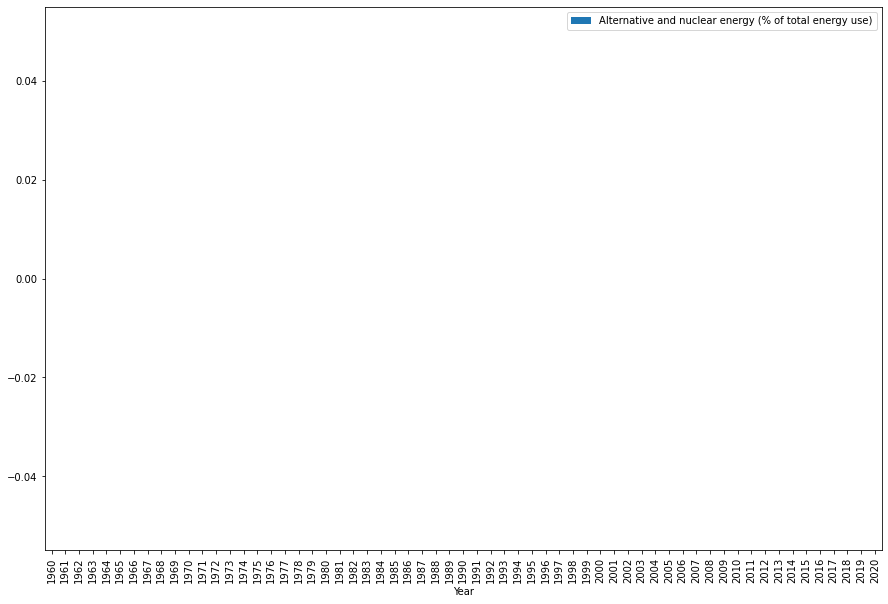

Electric power consumption (kWh per capita)


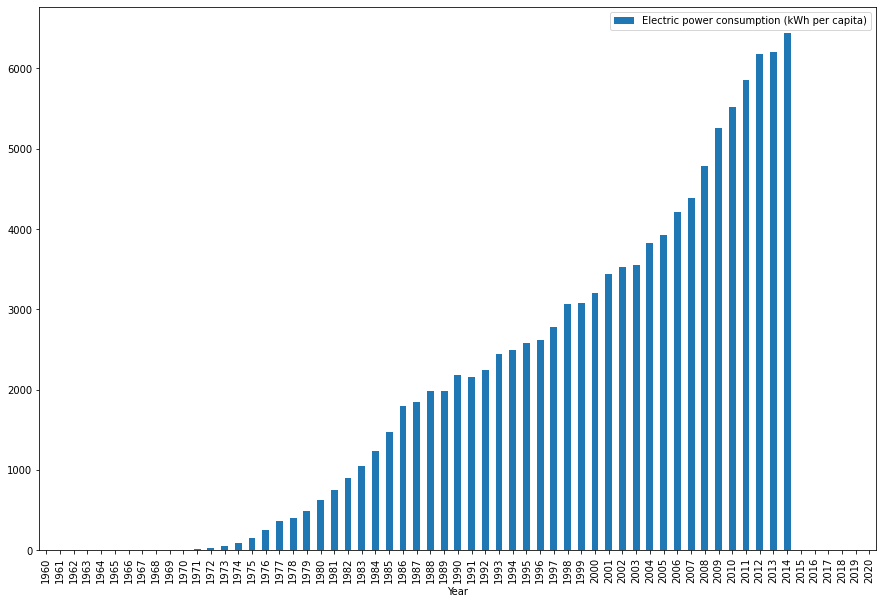

Electricity production from oil, gas and coal sources (% of total)


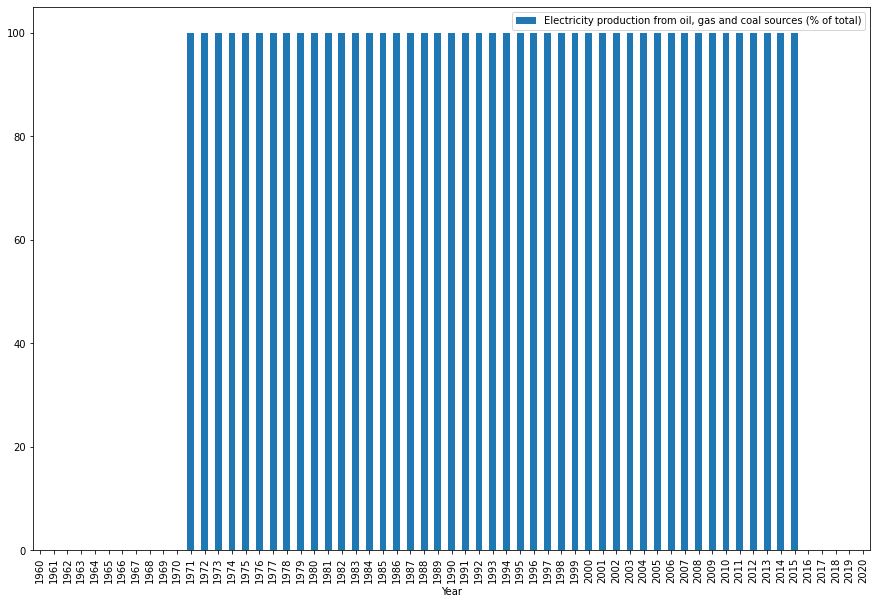

Energy imports, net (% of energy use)


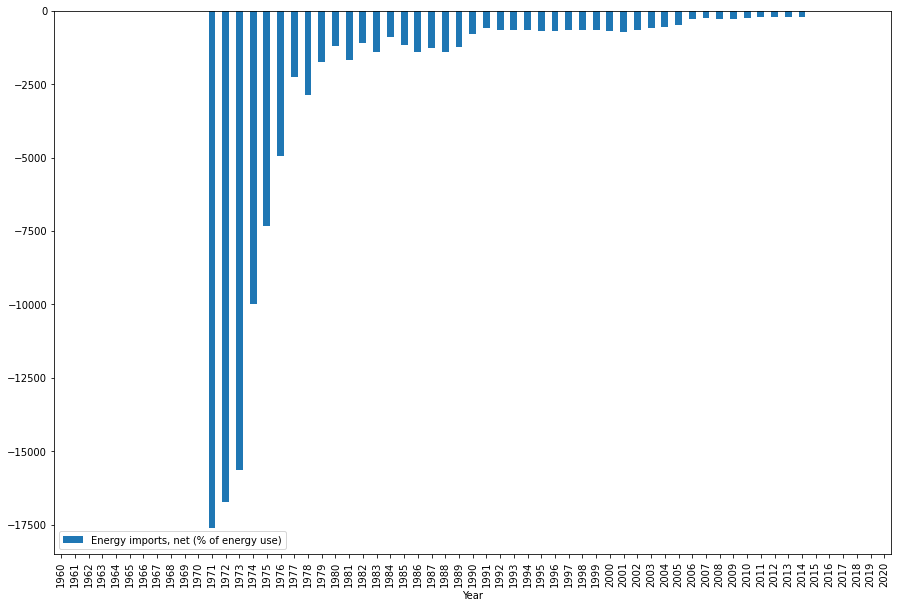

Energy use (kg of oil equivalent per capita)


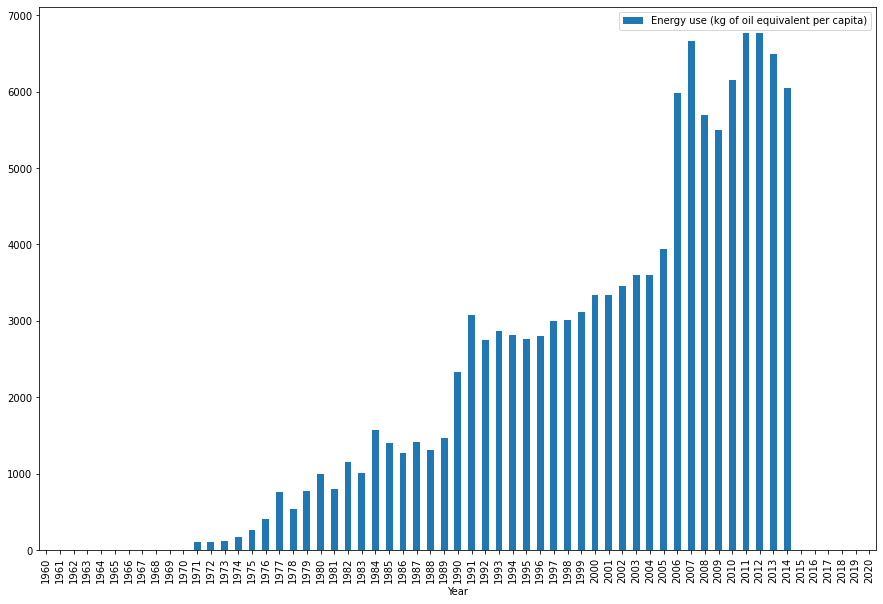

Fossil fuel energy consumption (% of total)


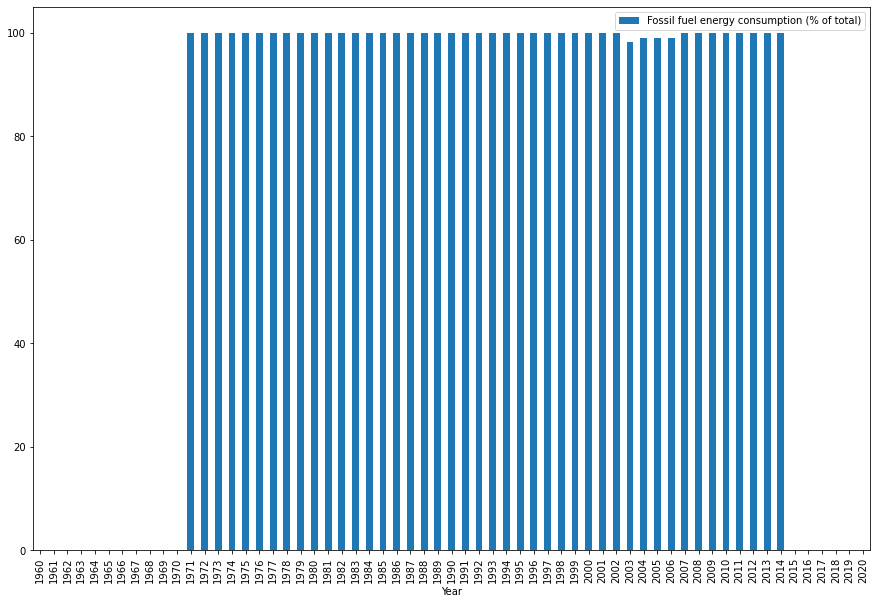

GDP per capita (constant 2015 US$)


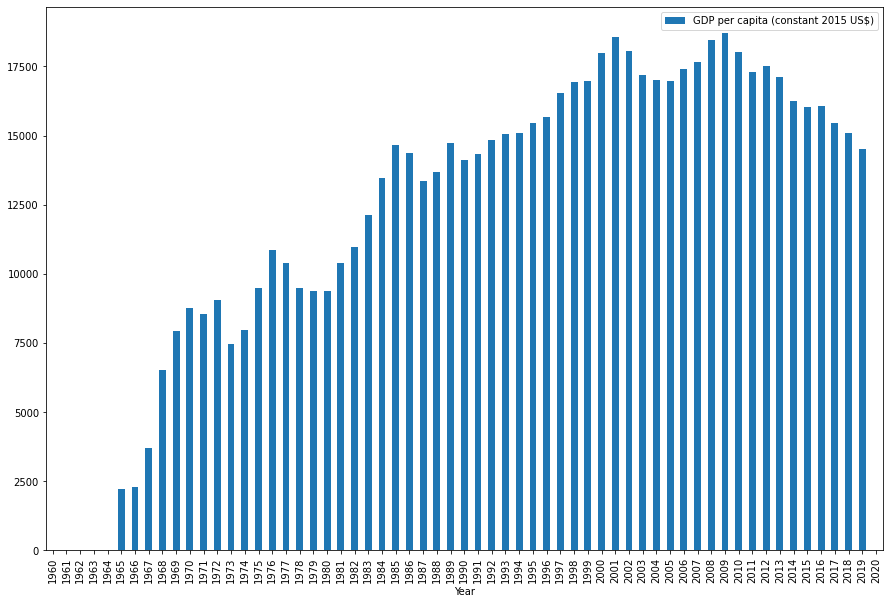

Population density (people per sq. km of land area)


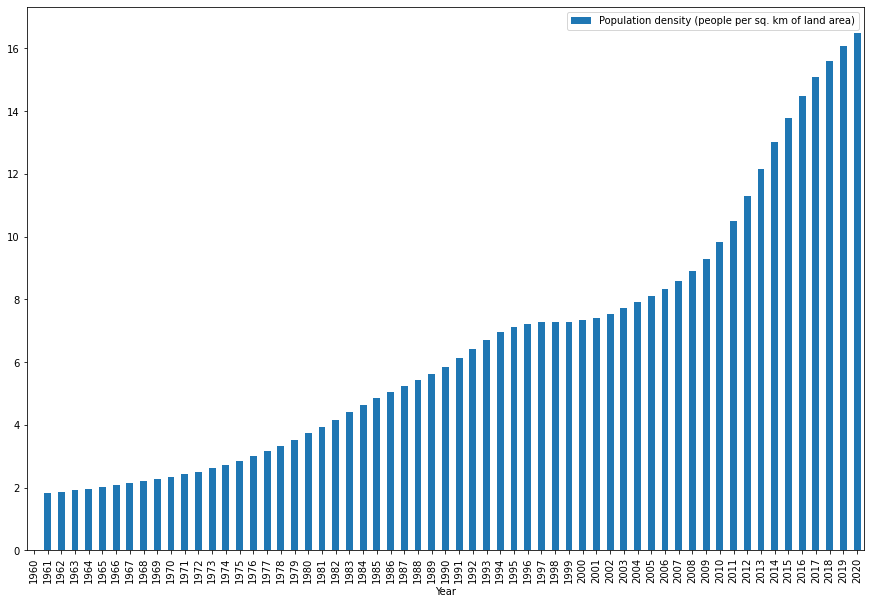

Urban population (% of total population)


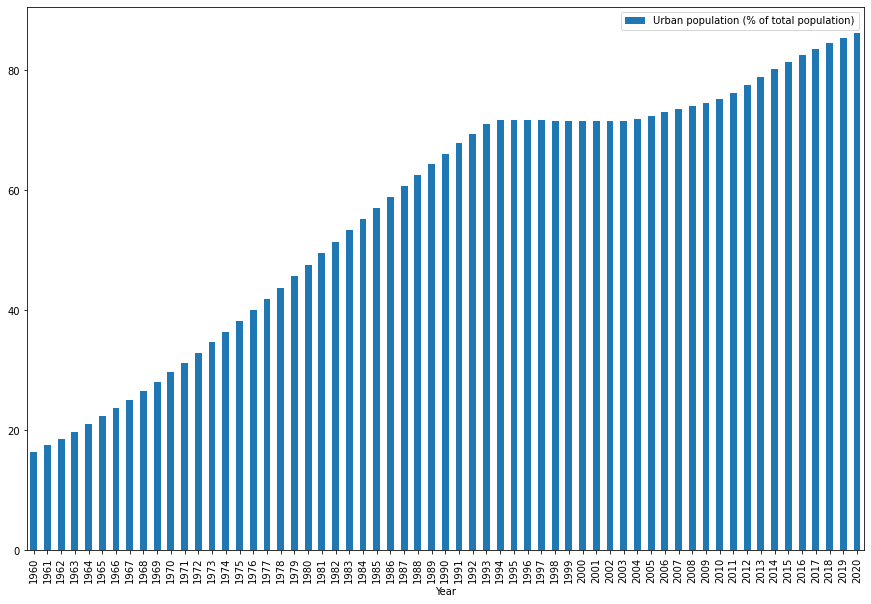

CO2 emissions (kt)


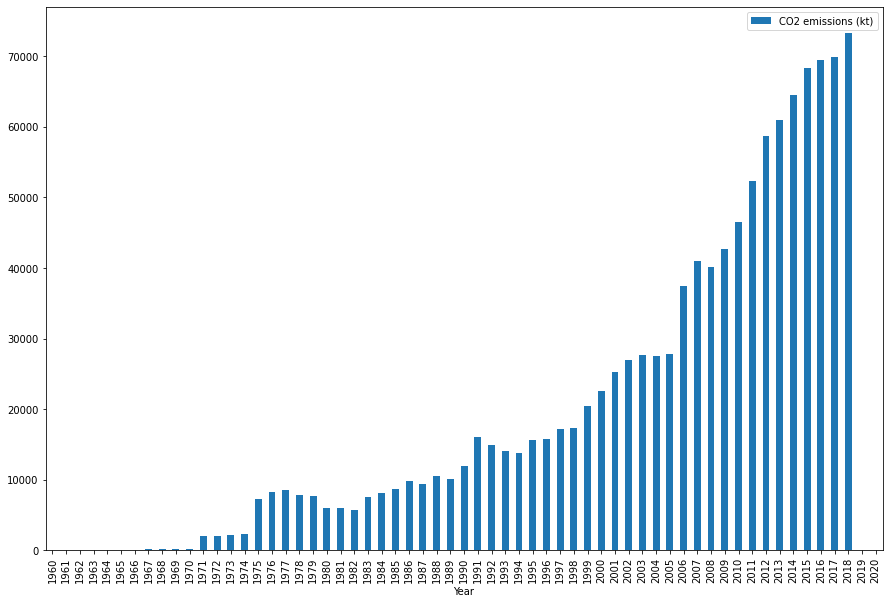

Methane emissions (kt of CO2 equivalent)


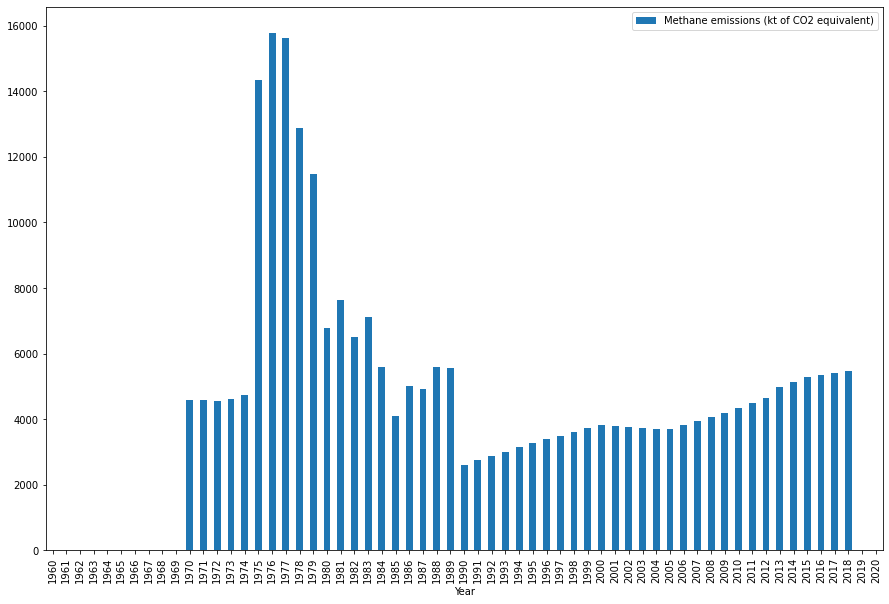

Nitrous oxide emissions (thousand metric tons of CO2 equivalent)


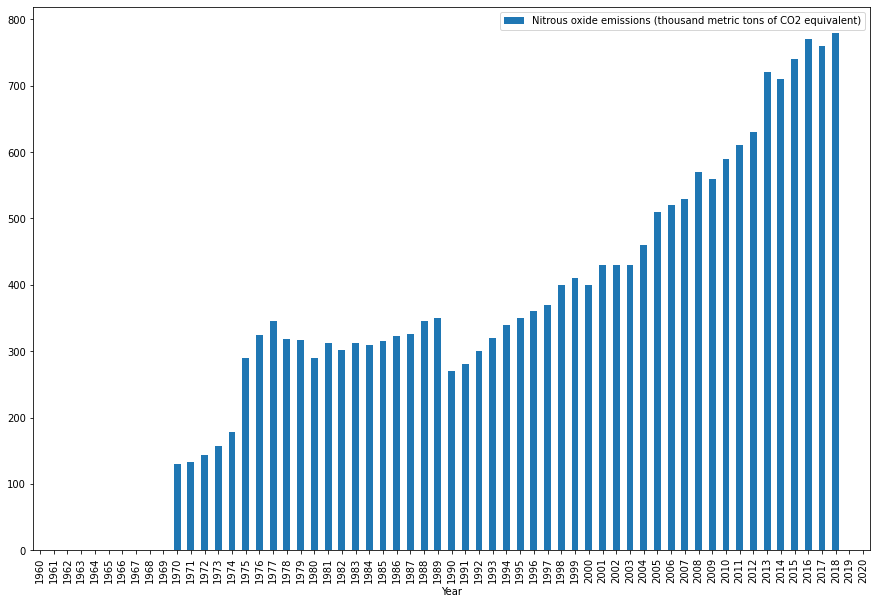

Total greenhouse gas emissions (kt of CO2 equivalent)


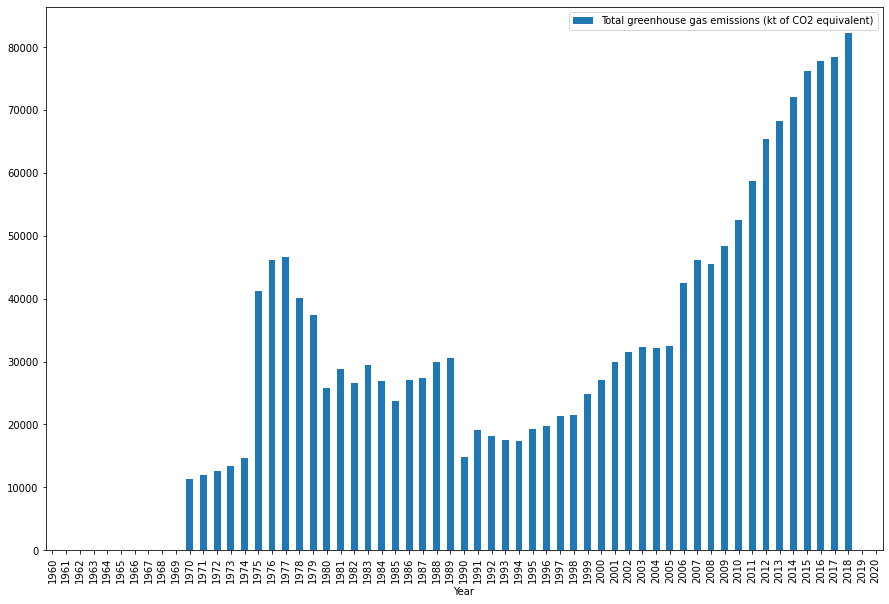

In [ ]:
dfOman = df.loc[df['Country'] == "Oman"]
for yval in yvals:
  print(yval)
  dfOman.plot(y=yval, x='Year', kind='bar', figsize=(15, 10))
  plt.show()

#Missing values
In the dataset, the missing values are represented by .. so I replaced them with nan values. The only way to deal with these missing values is to eliminate their rows as this is time series data for each individual country so replacing with any constant value does not make sense.

In [ ]:
df.replace("..", np.NaN, inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 20 to 603
Data columns (total 15 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Year                                                                350 non-null    int64  
 1   Country                                                             350 non-null    object 
 2   Alternative and nuclear energy (% of total energy use)              350 non-null    float64
 3   Electric power consumption (kWh per capita)                         350 non-null    float64
 4   Electricity production from oil, gas and coal sources (% of total)  350 non-null    float64
 5   Energy imports, net (% of energy use)                               350 non-null    float64
 6   Energy use (kg of oil equivalent per capita)                        350 non-null    float64
 7   Fossil fuel ener

##Correlation Analysis

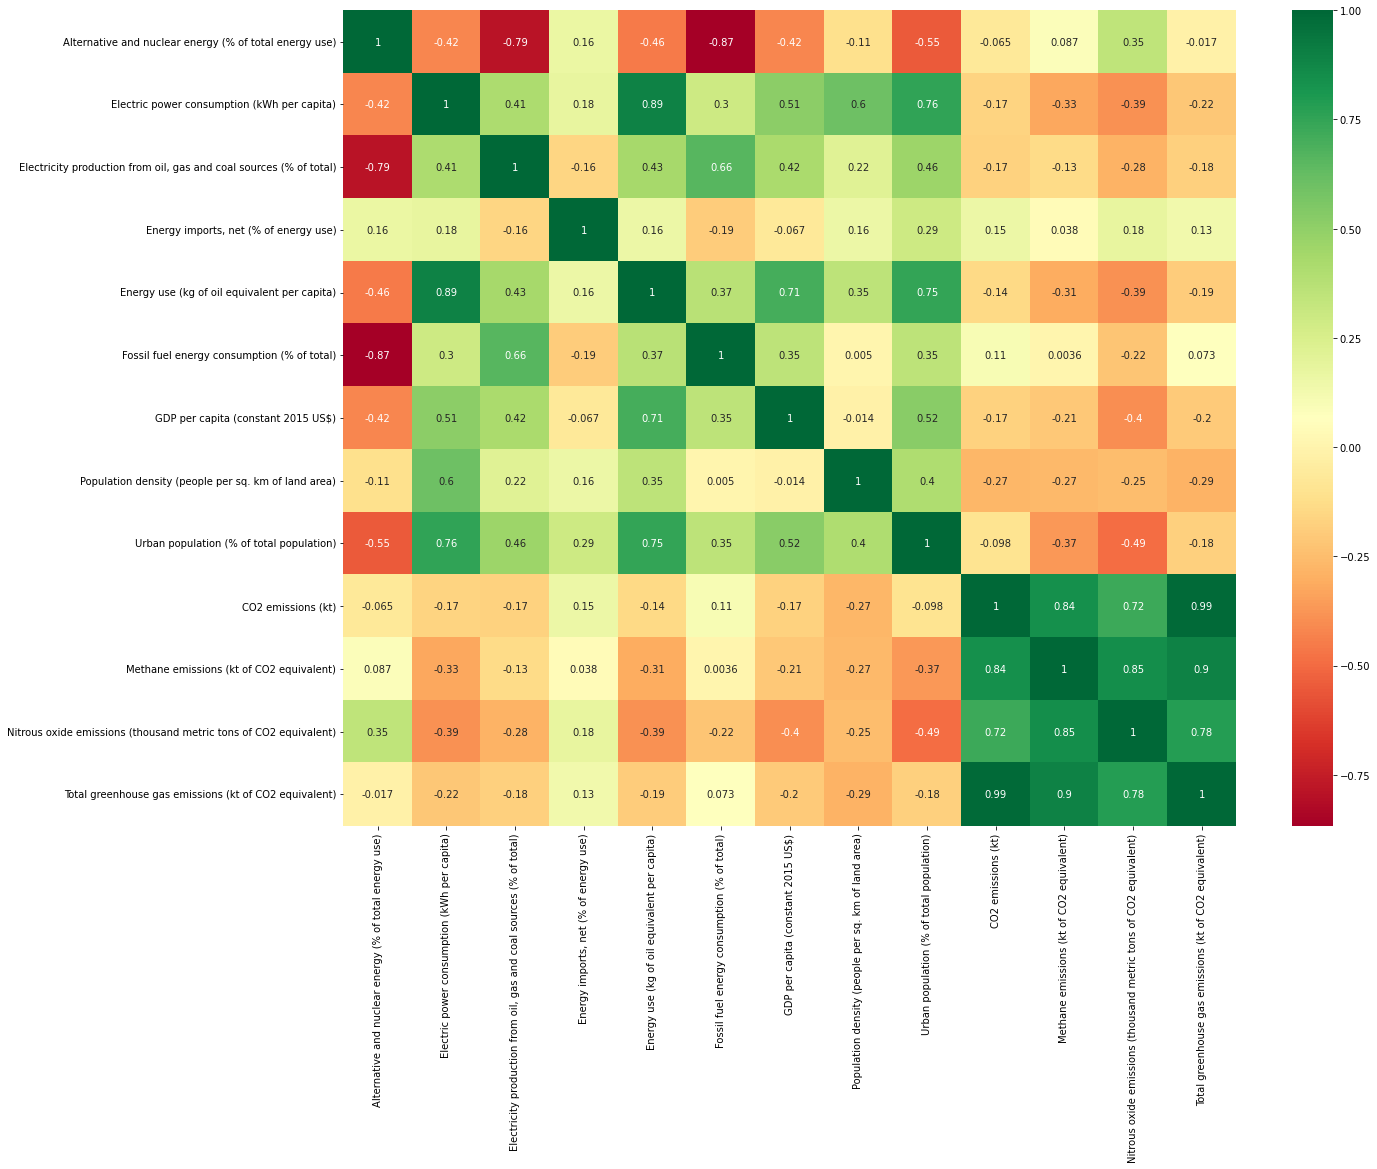

In [ ]:
corrdf = df.drop(["Year", "Country"], axis=1).corr()
top_corr_features = corrdf.index
plt.figure(figsize=(20, 15))
g = sns.heatmap(df.drop(["Year", "Country"], axis=1)[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()

All of the variables seem valid. Highest correlation is for electricity consumption and energy use which makes sense but it is not high enough to remove one.

In [ ]:
yeardf = df.iloc[:,:-4]

In [ ]:
y = df.iloc[:,-4:]

##One Hot Encoding for the country column

In [ ]:
dummies = pd.get_dummies(yeardf[["Country"]])
oheyeardf = pd.concat([yeardf, dummies], axis=1)
oheyeardf = oheyeardf.drop(["Country", "Year"], axis=1)

In [ ]:
X = oheyeardf

#Targets

In [ ]:
YCO2 = df.iloc[:,-4]
YMethane = df.iloc[:,-3]
YN2O = df.iloc[:,-2]
YGHG = df.iloc[:,-1]

In [ ]:
countries = df["Country"].unique()
columns = list(df)
columns.remove("Year")
columns.remove("Country")

#Analysis of each column by country 

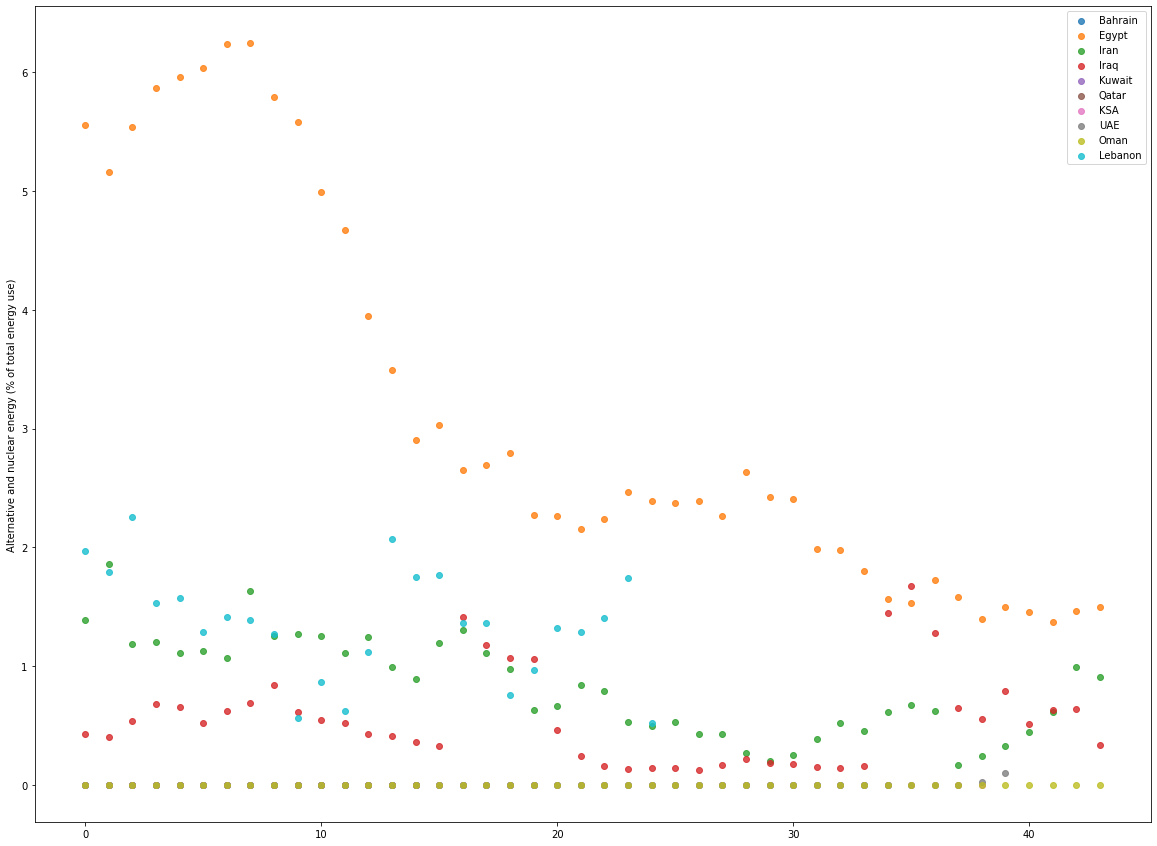

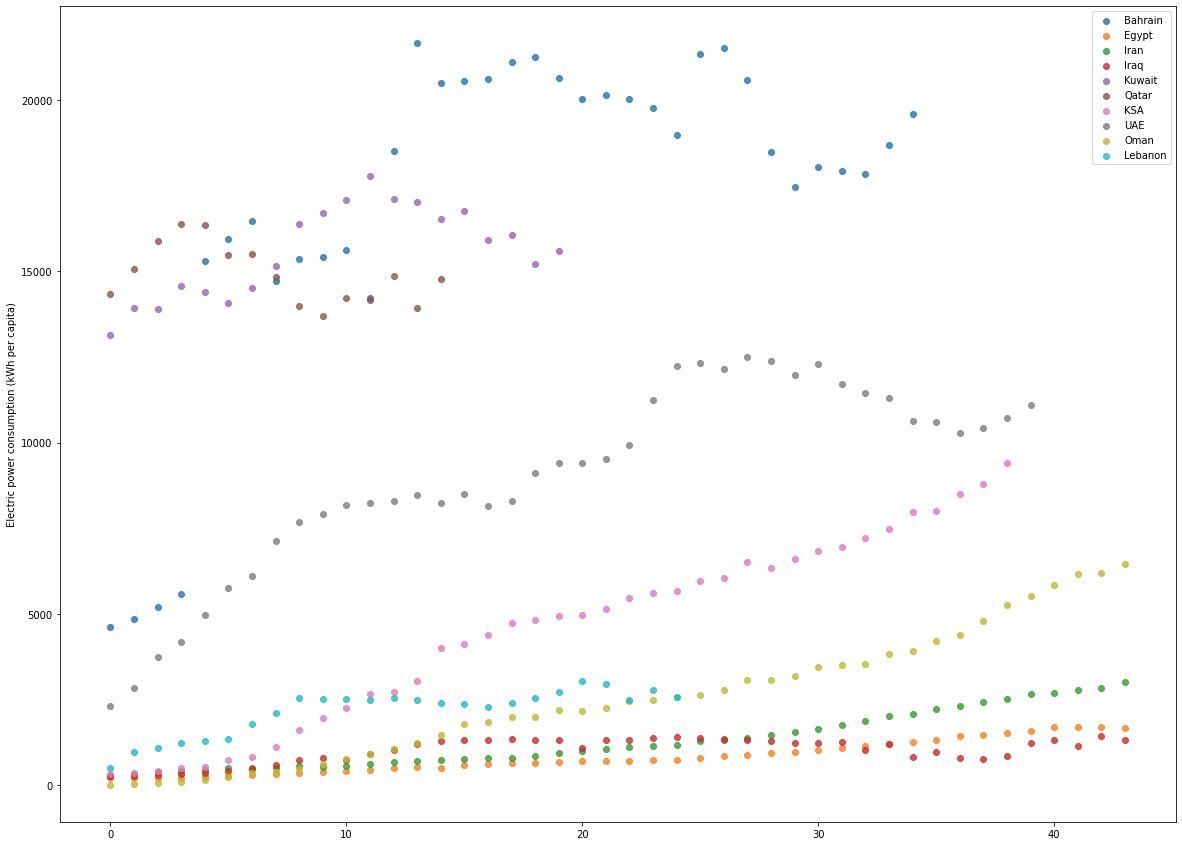

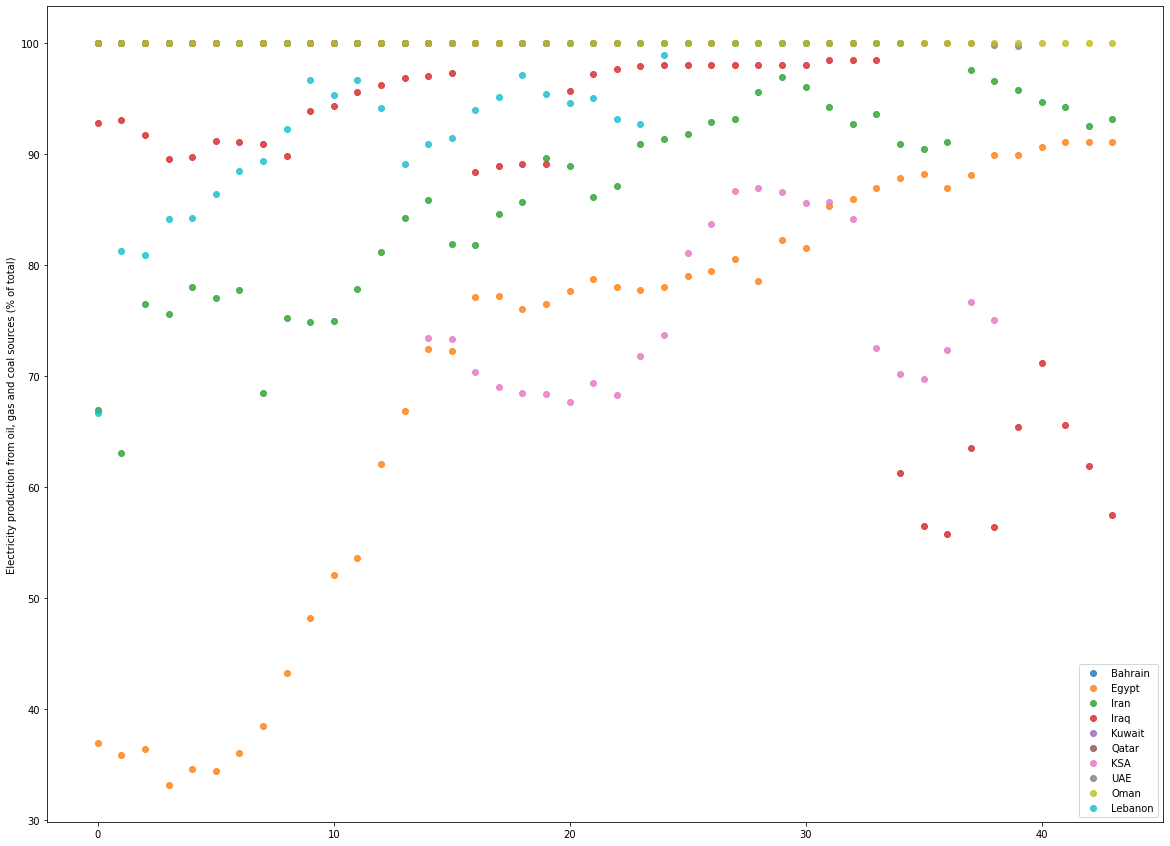

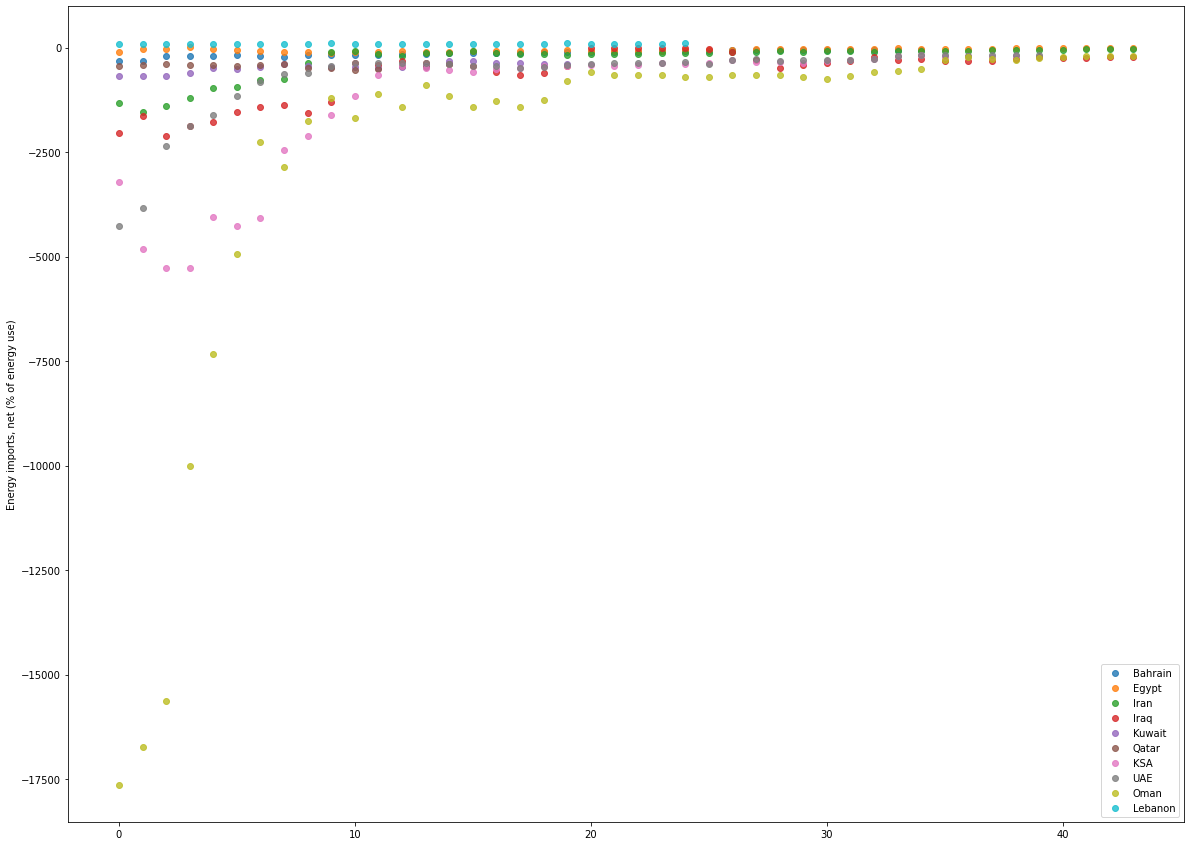

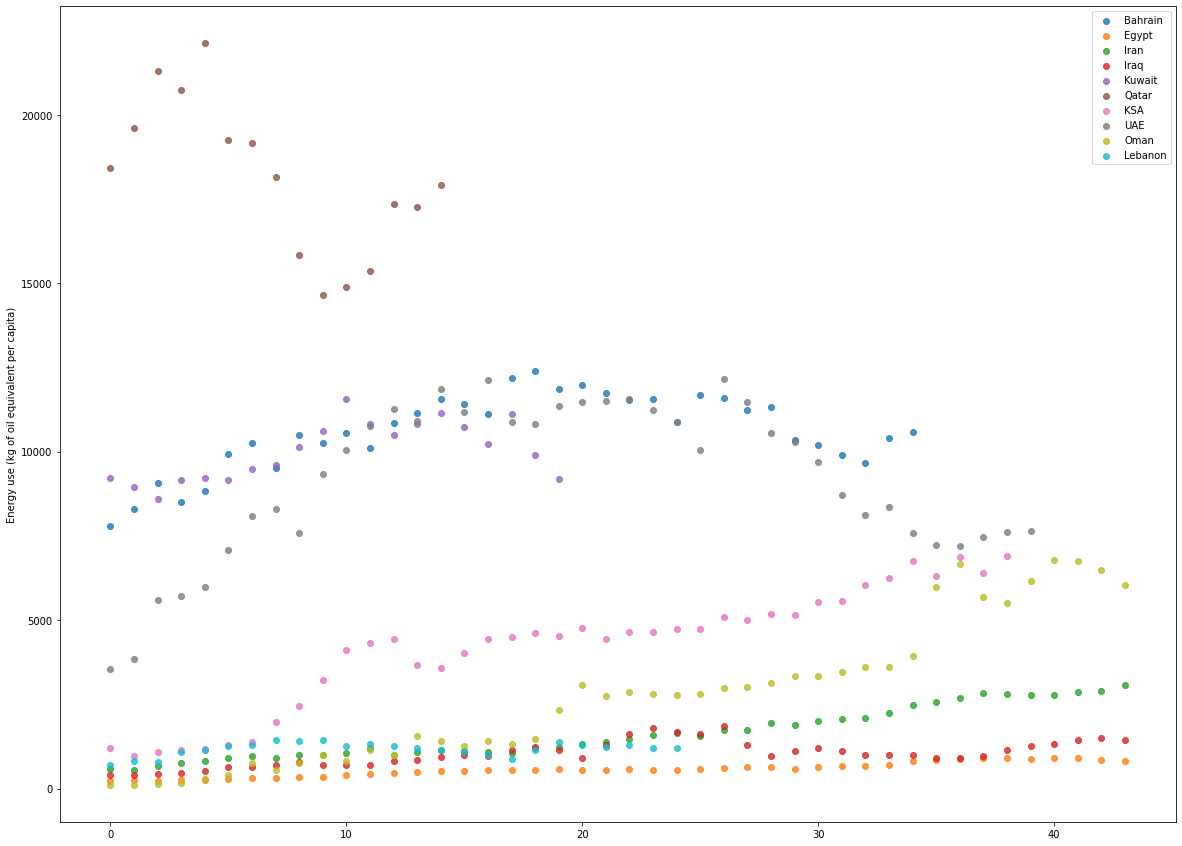

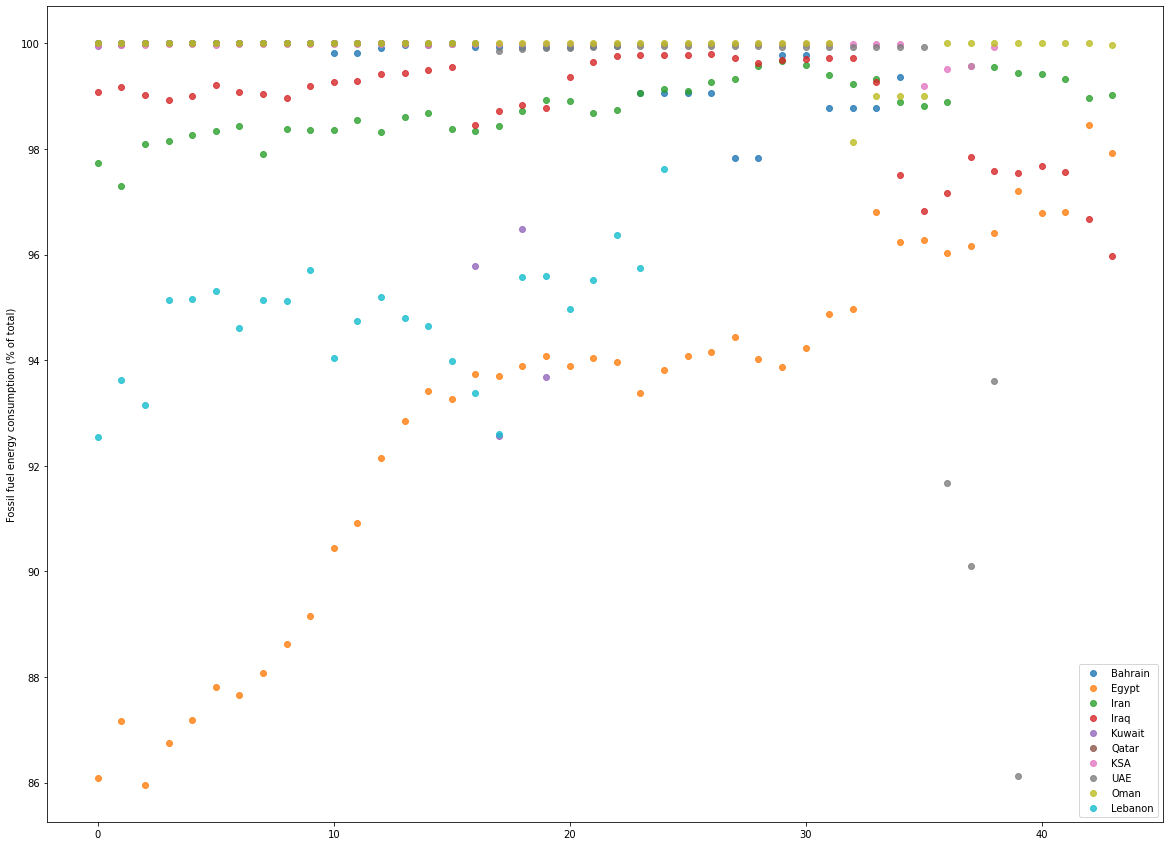

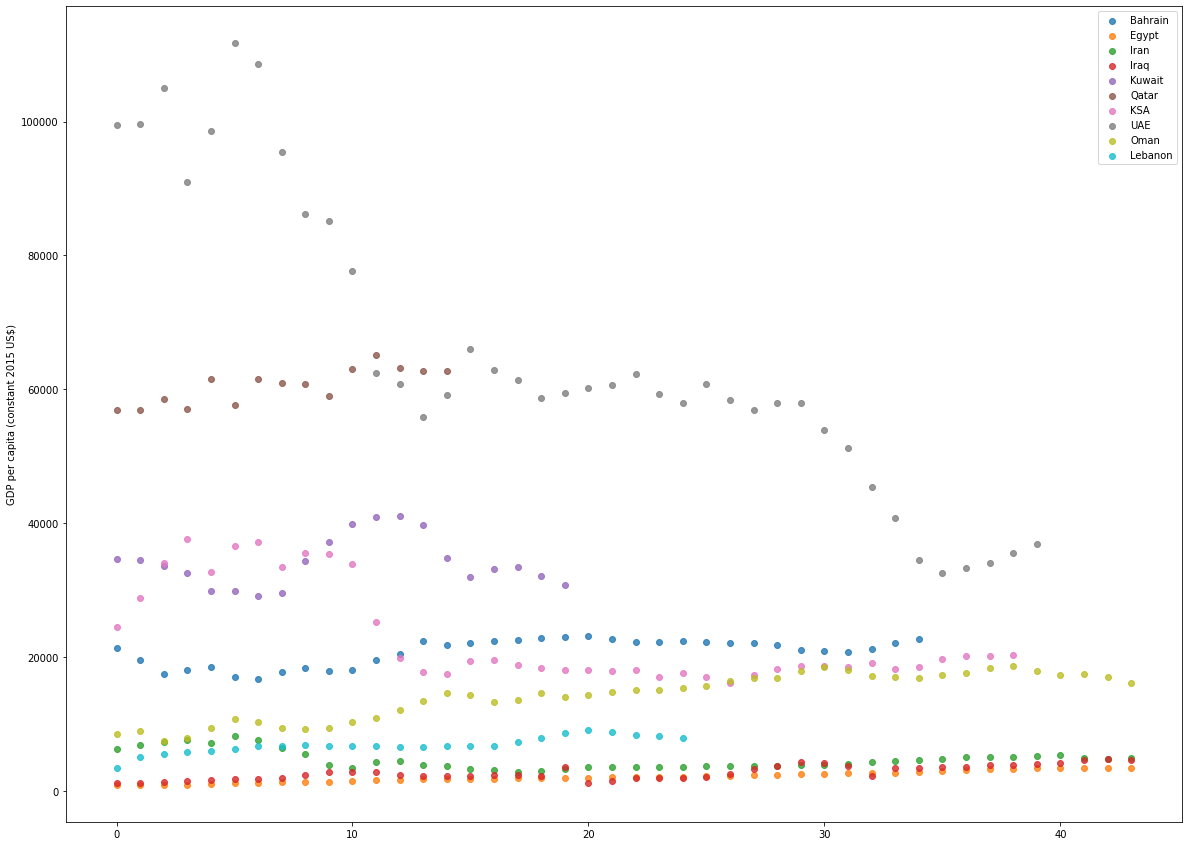

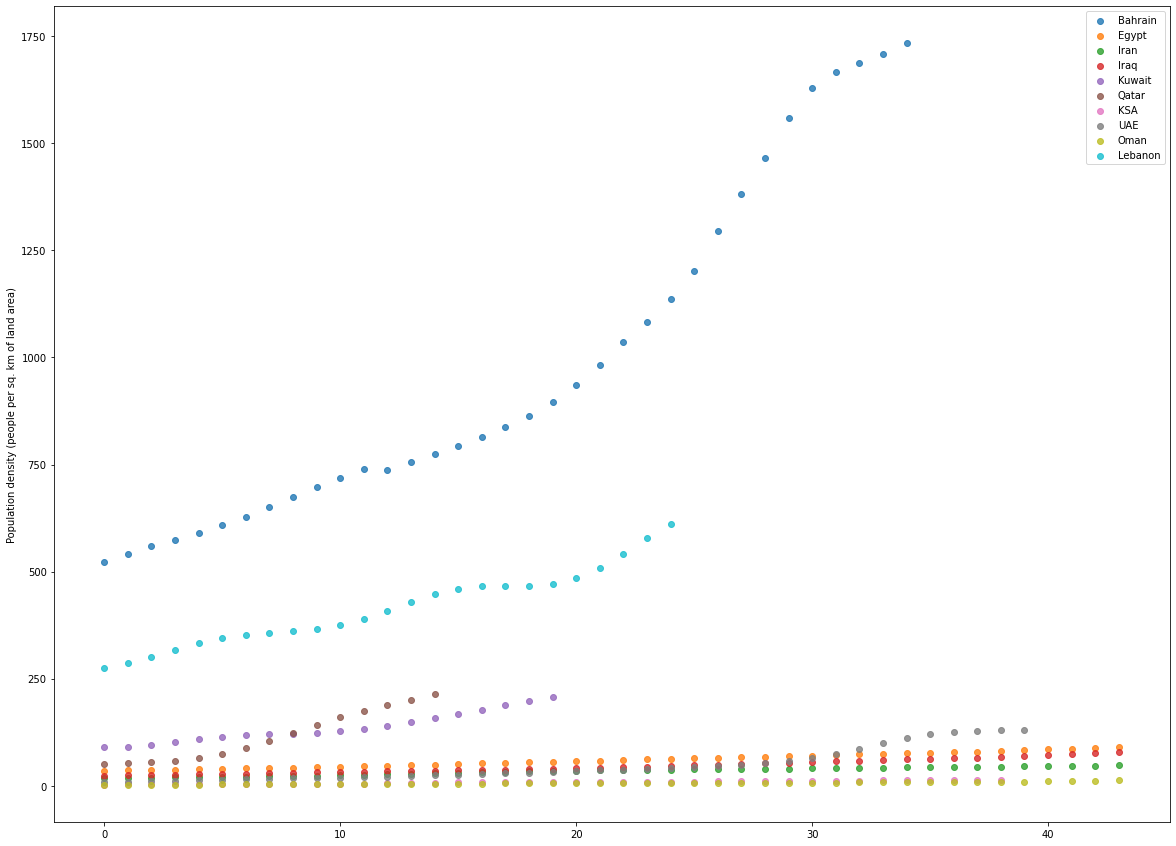

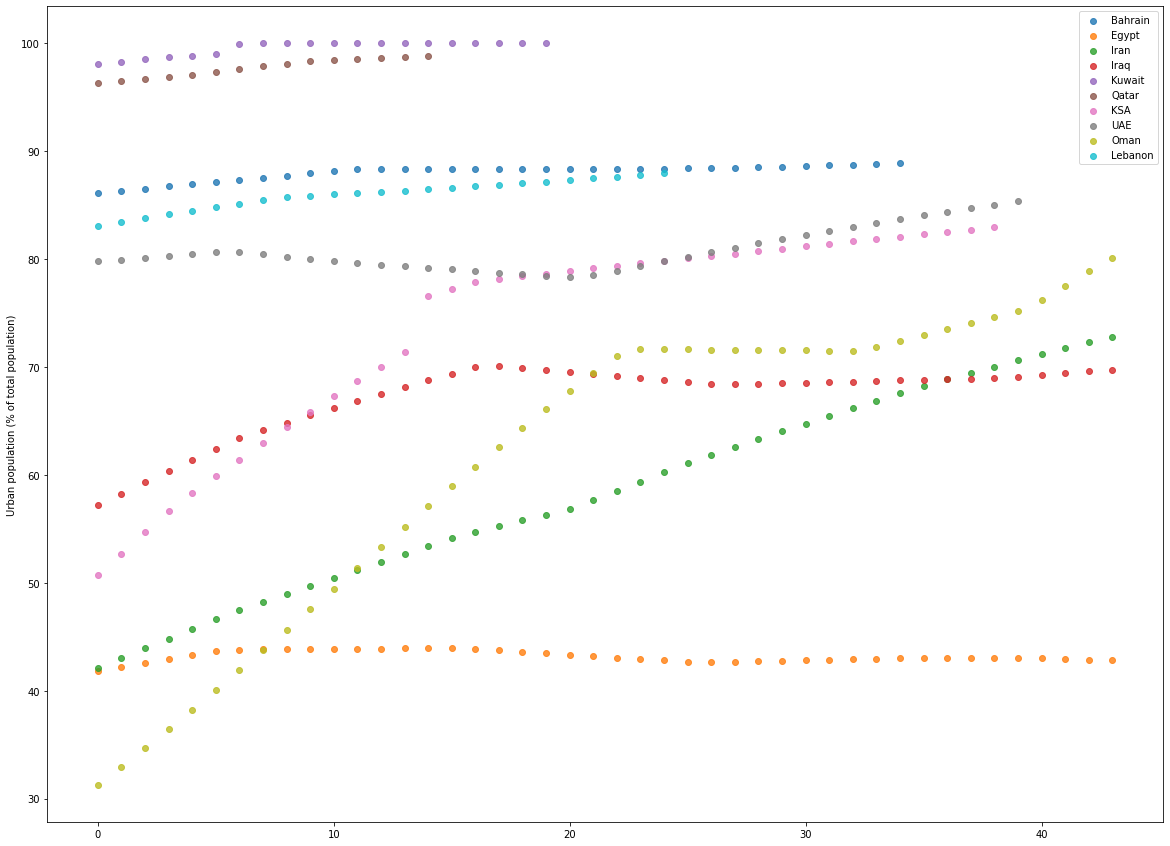

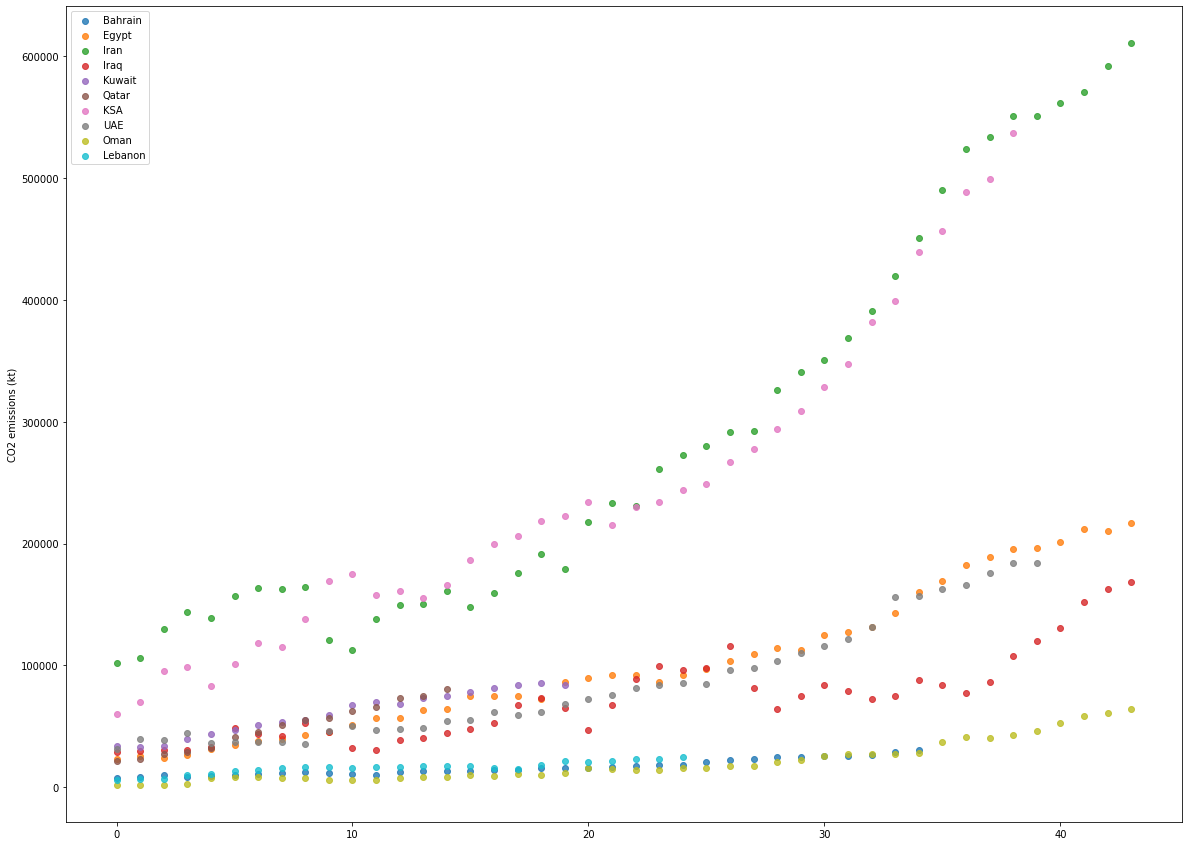

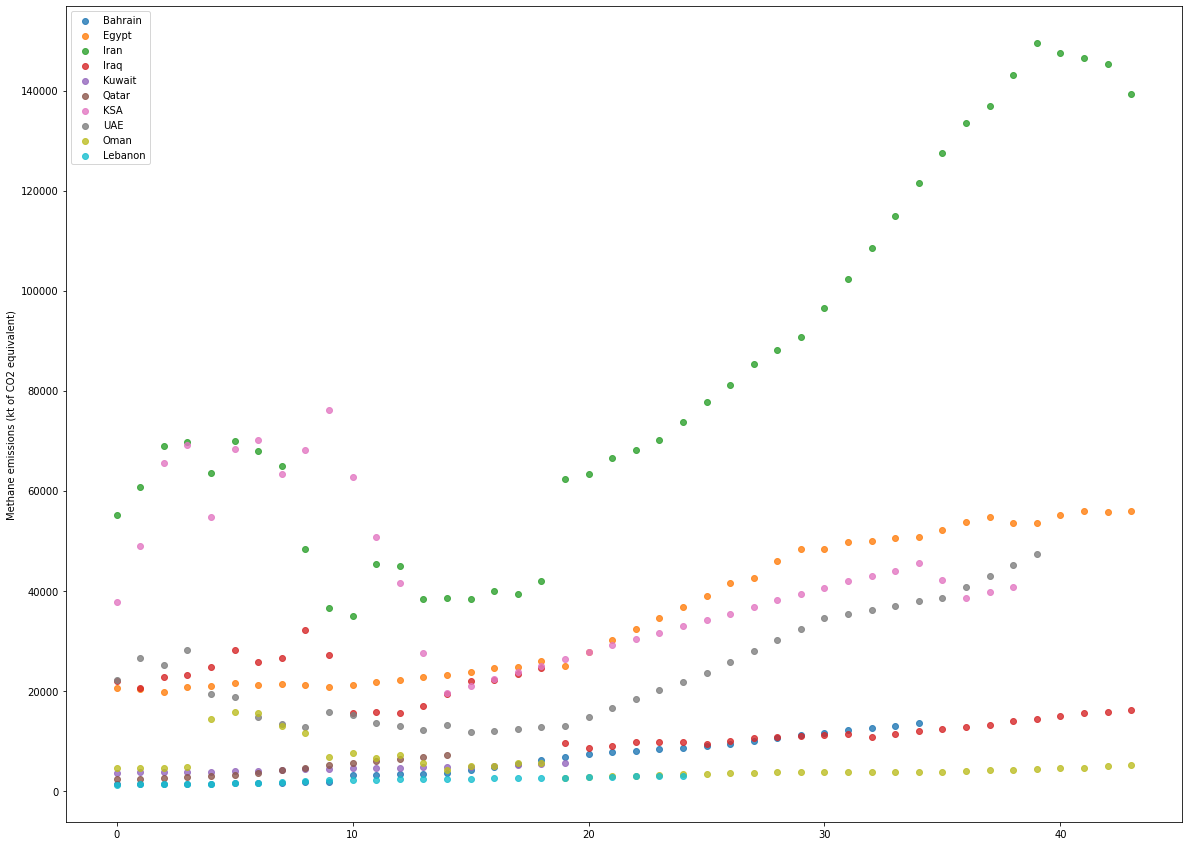

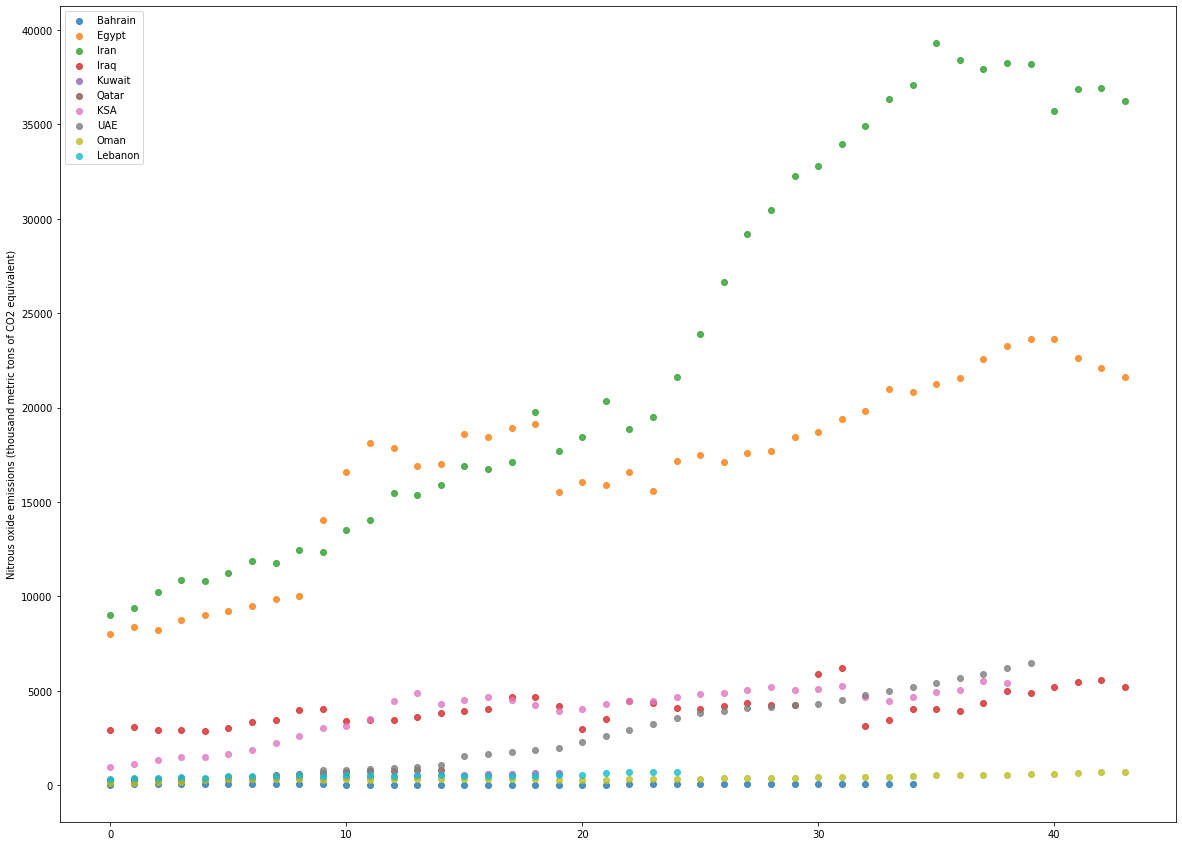

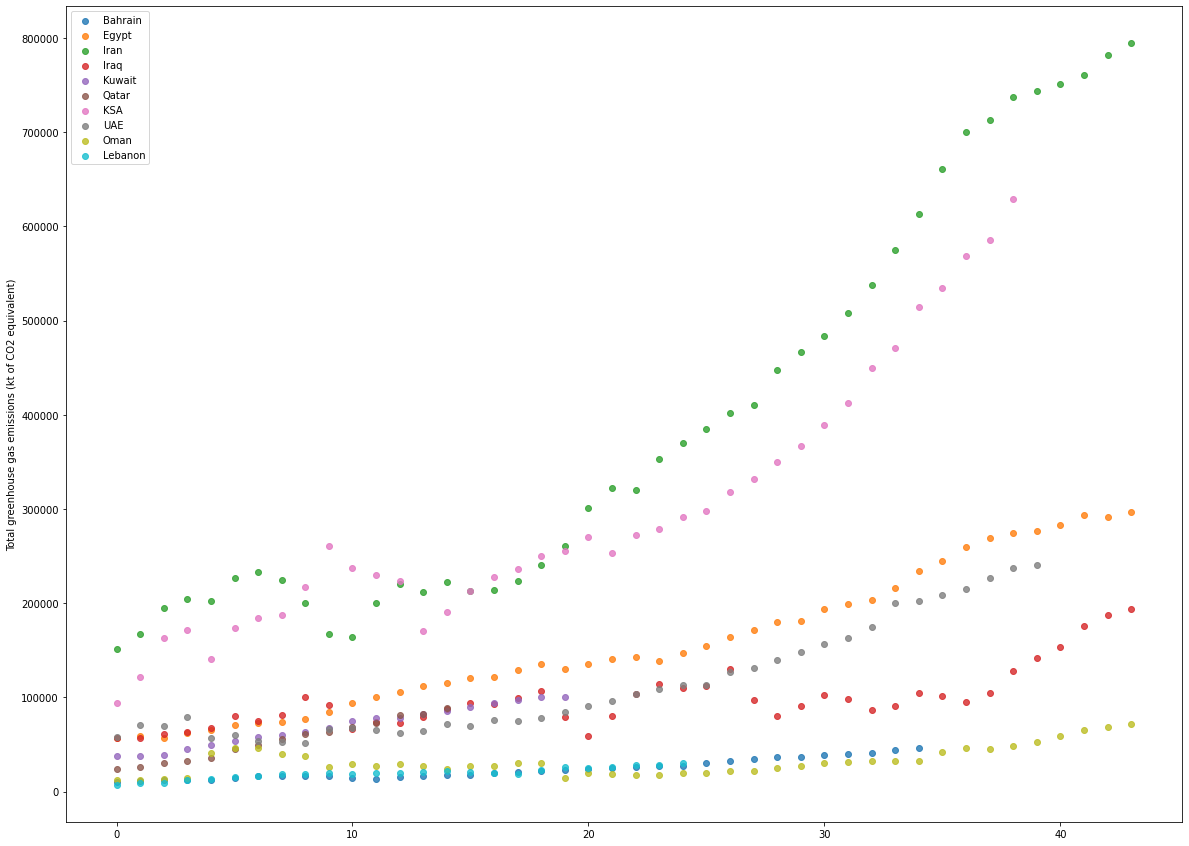

In [ ]:
for column in columns:
  f, ax = plt.subplots(figsize=(20, 15))
  for country in countries:
    sns.regplot(x=list(range((len(df.loc[df['Country'] == country][column])))), y=df.loc[df['Country'] == country][column], label = "country", fit_reg=False)
  plt.legend(labels=countries)
  plt.show()

##Train Test Splitting
The other 3 targets are also here. I tried them and the results are satisfactory but the report was becoming too long. It can be checked by commenting the first line and uncommenting whichever target is needed. 

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, YGHG, test_size=0.25,shuffle=True, random_state=485)
# X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, YCO2, test_size=0.25,shuffle=True, random_state=485)
# X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, YMethane, test_size=0.25,shuffle=True, random_state=485)
# X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, YN2O, test_size=0.25,shuffle=True, random_state=485)



##Scaling


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

#Degree 2

In [ ]:
pol = PolynomialFeatures(degree=2, include_bias=False)
X_ptrain = pol.fit_transform(X_train)
X_ptest = pol.fit_transform(X_test)


In [ ]:
psc = StandardScaler()
X_ptrain = psc.fit_transform(X_ptrain)
X_ptest = psc.transform (X_ptest)

#Evaluation Metrics
Coefficient of Determination(r^2) : The coefficient of determination is used to explain how much the variability of y(target) can be explained by the x(feature) variables. It ranges from 0 to 1 with 1 being the best value. It is one of the most important metrics for regression, so I used it.

Mean square error: The MSE tells us how close the predicted value is to the actual value. It represents the total of the squares of the differences between each predicted and actual value. It is the most important regression metric and is used for optimization and coming up with the best possible solution.


Mean absolute error: MAE is the average of the absolute values of the differences between each prediction and true value. It is easier to interpret as it is in the same scale as y.



#List of Regressor Models

Linear regression: Linear regression models the relationship between the predictor variables and the predicted while considering each term as a linear relationship. It is the baseline approach for regression and easy to interpret so I used it.

Linear regression with degree 2 features: Same as the above except that the predictor variables are represented as powers of 2 with each variable also influencing the target as a combination of at most features. Linear relationships are hard to come by and often, a power of 2 at least can explain a complex model better.

Support Vector Regression: Support vector machine classification essentially draws a line(or plane) to separate different points in a hyperplane to classify them. Support vector regression is similar in terms of the line but here the line represents the equation y = wx+b and the values are considered around it with the minimum MSE. It is a popular model.

Decision Tree Regression: Decision tree regression works similarly to decision tree classifier but here the output is continuous and MSE has to be minimized. It makes a decision on every split based on the features and comes to a node with a continuous output. This is determined from the training data and usually the reason why it may overfit. It is also a popular model.

I also used lasso, ridge and elastic net regularization as these give a penalty to the weights which prevents extremely large coefficients and hence prevents overfitting. Lasso uses L1 regularization, Ridge uses L2, whereas elastic net uses a combination of both.

#Hyperparameter Tuning
As the dataset was small, I used cross validation using grid search wherever necessary and where required to find the hyperparameters. The performance for the default decision tree was already great and it seemed to get worse after tuning the hyperparameters so I commented it.

##Linear regression

In [ ]:
regress = LinearRegression()
regress.fit(X_train, Y_train)
# print(regress.score(X_train, Y_train))
print(regress.coef_)
print(regress.intercept_)
Y_pred = regress.predict(X_test)
# print(regress.score(X_test, Y_test))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))
print ("Mean squared error (train): ", mean_squared_error(Y_train, regress.predict(X_train)))
print ("Mean error (train): ", mean_absolute_error(Y_train, regress.predict(X_train)))
print ("Mean squared error (test): ", mean_squared_error(Y_test, Y_pred))
print ("Mean error (test): ", mean_absolute_error(Y_test, Y_pred))

[ -55502.92437102   25076.69590087    1866.46386938  -50110.71922238
  -13505.03634199   -7170.1894075   -47230.71197481   -1375.18979221
  197988.56628527 -100025.52565346  136570.22182338  134775.25794863
   -8184.59567232   35692.65693821  -96416.33674749  -70272.52795694
  -27423.52372384  -59284.02989988  -19524.77838162]
143678.5824809924
Coefficient of determination: 0.83
Mean squared error (train):  4841381759.282284
Mean error (train):  47751.67100162987
Mean squared error (test):  2564417127.6177907
Mean error (test):  36241.6437824904


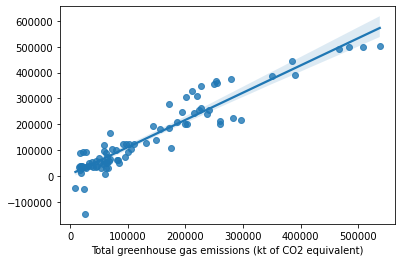

In [ ]:
sns.regplot(x=Y_test, y=Y_pred);

##Lasso Regression

In [ ]:
regress = LassoCV(cv=5).fit(X_train, Y_train)
print(regress.coef_)
print(regress.intercept_)
Y_pred = regress.predict(X_test)
# print(regress.score(X_test, Y_test))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))
print ("Mean squared error (train): ", mean_squared_error(Y_train, regress.predict(X_train)))
print ("Mean error (train): ", mean_absolute_error(Y_train, regress.predict(X_train)))
print ("Mean squared error (test): ", mean_squared_error(Y_test, Y_pred))
print ("Mean error (test): ", mean_absolute_error(Y_test, Y_pred))

[-4.89993377e+04  1.15385308e+04  0.00000000e+00 -4.35877613e+04
 -0.00000000e+00 -1.01619909e+02 -4.96462843e+04  0.00000000e+00
  1.79779360e+05 -7.79575267e+04  1.42226956e+05  1.45708642e+05
  6.39557017e+03  5.22793025e+04 -7.33816944e+04 -5.11666610e+04
 -9.86952408e+03 -4.58088178e+04  0.00000000e+00]
143678.58248099237
Coefficient of determination: 0.84
Mean squared error (train):  4898803664.251685
Mean error (train):  47342.20552627394
Mean squared error (test):  2508988111.11162
Mean error (test):  36055.93156802471


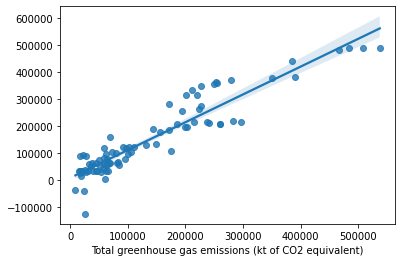

In [ ]:
sns.regplot(x=Y_test, y=Y_pred);

##Ridge Regression

In [ ]:
regress = RidgeCV(cv=5).fit(X_train, Y_train)
print(regress.coef_)
print(regress.intercept_)
Y_pred = regress.predict(X_test)
# print(regress.score(X_test, Y_test))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))
print ("Mean squared error (train): ", mean_squared_error(Y_train, regress.predict(X_train)))
print ("Mean error (train): ", mean_absolute_error(Y_train, regress.predict(X_train)))
print ("Mean squared error (test): ", mean_squared_error(Y_test, Y_pred))
print ("Mean error (test): ", mean_absolute_error(Y_test, Y_pred))

[-52928.58859634  24588.1359783    2281.92098868 -44495.07499663
 -11345.61467991  -6405.95552434 -48661.5093374   -2991.81672744
 181069.22020642 -94591.28950195 125611.78304476 129561.39455234
  -9665.23272603  36895.30830596 -89764.24792573 -66601.19058053
 -28818.76105314 -54798.42254004 -16523.75121056]
143678.5824809924
Coefficient of determination: 0.84
Mean squared error (train):  4868175224.101288
Mean error (train):  47690.55763110317
Mean squared error (test):  2492905370.1650205
Mean error (test):  36156.67082669327


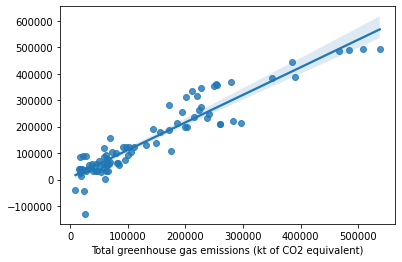

In [ ]:
sns.regplot(x=Y_test, y=Y_pred);

##Elastic Net Regression

In [ ]:
regress = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=1e-3, n_alphas=100, fit_intercept=True, 
                        precompute='auto', max_iter=2000, tol=0.0001, cv=6, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=0)
regress.fit(X_train, Y_train)
Y_pred = regress.predict(X_test)
# print(regress.score(X_test, Y_test))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))
print ("Mean squared error (train): ", mean_squared_error(Y_train, regress.predict(X_train)))
print ("Mean error (train): ", mean_absolute_error(Y_train, regress.predict(X_train)))
print ("Mean squared error (test): ", mean_squared_error(Y_test, Y_pred))
print ("Mean error (test): ", mean_absolute_error(Y_test, Y_pred))

Coefficient of determination: 0.83
Mean squared error (train):  4864545022.133071
Mean error (train):  47358.94591544779
Mean squared error (test):  2518190070.2171803
Mean error (test):  35874.26876389318


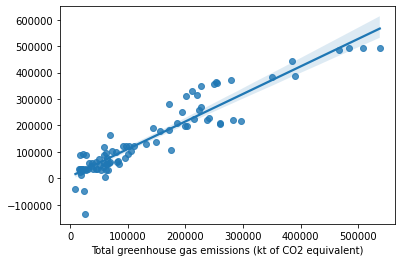

In [ ]:
sns.regplot(x=Y_test, y=Y_pred);

#Degree 2 Regression

##Degree 2 Linear Regression

In [ ]:
regress = LinearRegression()
regress.fit(X_ptrain, Y_train)
# print(regress.score(X_train, Y_train))
# print(regress.coef_)
# print(regress.intercept_)
Y_pred = regress.predict(X_ptest)
# print(regress.score(X_test, Y_test))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))
print ("Mean squared error (train): ", mean_squared_error(Y_train, regress.predict(X_ptrain)))
print ("Mean error (train): ", mean_absolute_error(Y_train, regress.predict(X_ptrain)))
print ("Mean squared error (test): ", mean_squared_error(Y_test, Y_pred))
print ("Mean error (test): ", mean_absolute_error(Y_test, Y_pred))

Coefficient of determination: -85037278476235259904.00
Mean squared error (train):  15645949.299544051
Mean error (train):  2748.673814130906
Mean squared error (test):  1.297205817934811e+30
Mean error (test):  148084070815099.47


Extremely poor results, regularization is necessary.

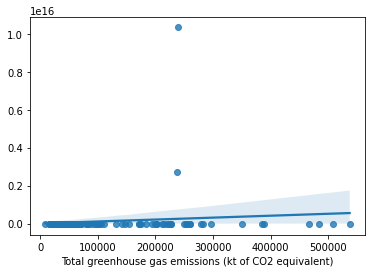

In [ ]:
sns.regplot(x=Y_test, y=Y_pred);

#Degree 2 Lasso Regression

In [ ]:
regress = LassoCV(cv=5).fit(X_ptrain, Y_train)
Y_pred = regress.predict(X_ptest)
# print(regress.score(X_test, Y_test))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))
print ("Mean squared error (train): ", mean_squared_error(Y_train, regress.predict(X_ptrain)))
print ("Mean error (train): ", mean_absolute_error(Y_train, regress.predict(X_ptrain)))
print ("Mean squared error (test): ", mean_squared_error(Y_test, Y_pred))
print ("Mean error (test): ", mean_absolute_error(Y_test, Y_pred))

Coefficient of determination: 0.99
Mean squared error (train):  104228277.3464978
Mean error (train):  7465.5102754568325
Mean squared error (test):  191789177.4391465
Mean error (test):  9785.759868361709


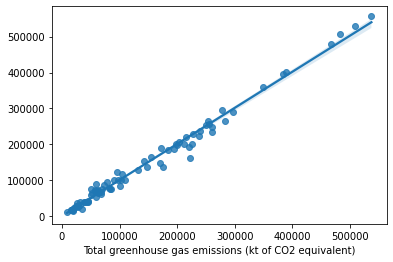

In [ ]:
sns.regplot(x=Y_test, y=Y_pred);

#Degree 2 Ridge Regression

In [ ]:
regress = RidgeCV(cv=5).fit(X_ptrain, Y_train)
Y_pred = regress.predict(X_ptest)
# print(regress.score(X_test, Y_test))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))
print ("Mean squared error (train): ", mean_squared_error(Y_train, regress.predict(X_ptrain)))
print ("Mean error (train): ", mean_absolute_error(Y_train, regress.predict(X_ptrain)))
print ("Mean squared error (test): ", mean_squared_error(Y_test, Y_pred))
print ("Mean error (test): ", mean_absolute_error(Y_test, Y_pred))

Coefficient of determination: 0.99
Mean squared error (train):  35091139.71394186
Mean error (train):  4208.638240028666
Mean squared error (test):  136016472.1258292
Mean error (test):  7782.138645774563


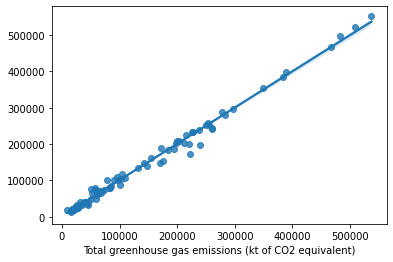

In [ ]:
sns.regplot(x=Y_test, y=Y_pred);

##Degree 2 Elastic Net Regression

In [ ]:
regress = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .99, 1], eps=1e-3, n_alphas=100, fit_intercept=True, 
                        precompute='auto', max_iter=2000, tol=0.0001, cv=6, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=485)
regress.fit(X_ptrain, Y_train)
Y_pred = regress.predict(X_ptest)
# print(regress.score(X_test, Y_test))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))
print ("Mean squared error (train): ", mean_squared_error(Y_train, regress.predict(X_ptrain)))
print ("Mean error (train): ", mean_absolute_error(Y_train, regress.predict(X_ptrain)))
print ("Mean squared error (test): ", mean_squared_error(Y_test, Y_pred))
print ("Mean error (test): ", mean_absolute_error(Y_test, Y_pred))

Coefficient of determination: 0.99
Mean squared error (train):  100108972.78206536
Mean error (train):  7218.242770793139
Mean squared error (test):  186168043.35204497
Mean error (test):  9615.670801475493


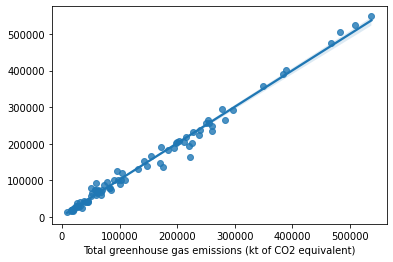

In [ ]:
sns.regplot(x=Y_test, y=Y_pred);

#Support Vector Regression

In [ ]:
Hparams = {'C': [0.1,1,10,100,1000],
              'gamma': [10,1,0.1,0.01,0.001],
              'kernel': ['rbf','linear','poly'],
              'degree' : [1,2]}
 
grid = GridSearchCV(SVR(), Hparams, refit = True)
 
grid.fit(X_train, Y_train)
print(grid.best_estimator_)

SVR(C=1000, degree=2, gamma=10, kernel='poly')


This takes a very long time and often gets stuck.

In [ ]:
svregress = SVR(C=1000, degree=2, gamma=10, kernel='poly')
svregress.fit(X_train, Y_train)
Y_pred = svregress.predict(X_test)
# print(regress.score(X_test, Y_test))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))
print ("Mean squared error (train): ", mean_squared_error(Y_train, svregress.predict(X_train)))
print ("Mean error (train): ", mean_absolute_error(Y_train, svregress.predict(X_train)))
print ("Mean squared error (test): ", mean_squared_error(Y_test, Y_pred))
print ("Mean error (test): ", mean_absolute_error(Y_test, Y_pred))

Coefficient of determination: 0.98
Mean squared error (train):  94759297.25786519
Mean error (train):  5411.486495554714
Mean squared error (test):  330625788.8213831
Mean error (test):  11724.061639339563


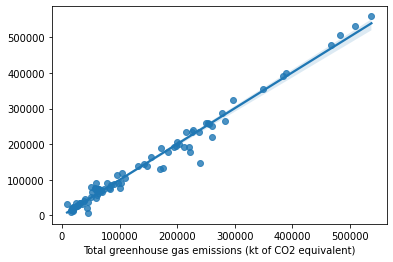

In [ ]:
sns.regplot(x=Y_test, y=Y_pred);

In [ ]:
# HParams={  "max_depth" : [1,2,3,5,7,8,11,12],
#            "min_samples_leaf":[1,2,3,5,7,8,9,10],
#            "min_weight_fraction_leaf":[0.1,0.25,0.5,0.75,0.9],
#            "max_features":["auto","log2","sqrt",None],
#            "max_leaf_nodes":[None,10,25,50,75,80,90] }

# grid = GridSearchCV(regressor, HParams)
# grid.fit(X_train, Y_train)
# print(grid.best_params_)
#This was for decision tree but the performance decreased so I left it

#Decision Tree Regression

In [ ]:
dtr = DecisionTreeRegressor(random_state=485)
dtr.fit(X_train, Y_train)
Y_pred = dtr.predict(X_test)
# print(regress.score(X_test, Y_test))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))
print ("Mean squared error (train): ", mean_squared_error(Y_train, dtr.predict(X_train)))
print ("Mean error (train): ", mean_absolute_error(Y_train, dtr.predict(X_train)))
print ("Mean squared error (test): ", mean_squared_error(Y_test, Y_pred))
print ("Mean error (test): ", mean_absolute_error(Y_test, Y_pred))

Coefficient of determination: 0.98
Mean squared error (train):  0.0
Mean error (train):  0.0
Mean squared error (test):  249013533.95476636
Mean error (test):  10577.623572159091


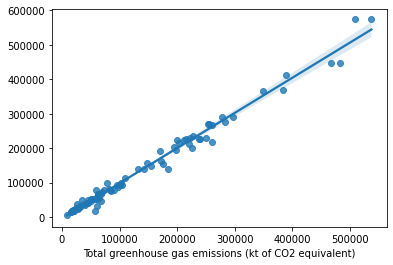

In [ ]:
sns.regplot(x=Y_test, y=Y_pred);

#Feature Importance according to Decision Tree

[3.24458952e-03 8.58266413e-02 1.49605787e-03 1.22792902e-02
 6.15132424e-03 1.71129109e-02 2.21872350e-03 4.37789824e-02
 2.25548475e-01 0.00000000e+00 3.47434569e-02 3.77729212e-01
 0.00000000e+00 1.89869985e-01 1.05304065e-07 1.74010286e-10
 0.00000000e+00 2.45247285e-07 0.00000000e+00]


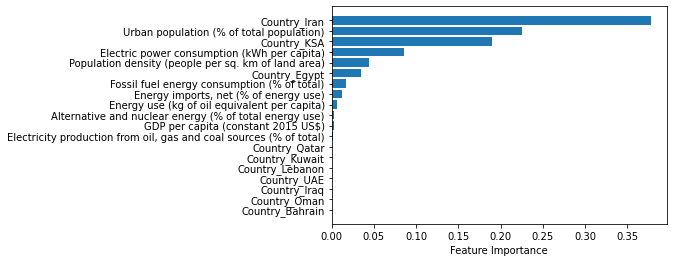

In [ ]:
print(dtr.feature_importances_)
sorted_idx = dtr.feature_importances_.argsort()
plt.barh(X.columns.ravel()[sorted_idx], dtr.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()

##Decision Tree Output

In [ ]:
plt.figure(figsize=(30, 24), dpi = 200)
tree.plot_tree(dtr, fontsize=10, feature_names=list(X), filled=True)
plt.show()

In [ ]:
text_representation = tree.export_text(dtr)
print(text_representation)

|--- feature_11 <= 1.10
|   |--- feature_13 <= 1.31
|   |   |--- feature_10 <= 1.15
|   |   |   |--- feature_7 <= 0.29
|   |   |   |   |--- feature_5 <= 0.62
|   |   |   |   |   |--- feature_3 <= 0.21
|   |   |   |   |   |   |--- feature_7 <= -0.45
|   |   |   |   |   |   |   |--- feature_5 <= 0.27
|   |   |   |   |   |   |   |   |--- feature_8 <= 0.06
|   |   |   |   |   |   |   |   |   |--- feature_1 <= -0.29
|   |   |   |   |   |   |   |   |   |   |--- value: [32240.00]
|   |   |   |   |   |   |   |   |   |--- feature_1 >  -0.29
|   |   |   |   |   |   |   |   |   |   |--- value: [32120.00]
|   |   |   |   |   |   |   |   |--- feature_8 >  0.06
|   |   |   |   |   |   |   |   |   |--- value: [32530.00]
|   |   |   |   |   |   |   |--- feature_5 >  0.27
|   |   |   |   |   |   |   |   |--- feature_3 <= -0.54
|   |   |   |   |   |   |   |   |   |--- value: [57101.48]
|   |   |   |   |   |   |   |   |--- feature_3 >  -0.54
|   |   |   |   |   |   |   |   |   |--- value: [56661.70]
|   

#Comparison of the best 5 results on the test set and observations


Model  | r^2 | MAE  | MSE
-----|-------|--------|-----|
2 Degree Ridge Regression      | 0.99 | 7782| 136016472  
2 Degree Elastic Net Regression      | 0.99      | 9616 | 186168043  
2 Degree Lasso Regression      | 0.99 | 9786|191789177 
Decision Tree Regression      | 0.98      | 10577|249013533 
Support Vector Regression      | 0.98      | 11724|330625788 

The 2 degree standard linear regressions models performed the best, with Decision Tree and Support Vector following. All the results are extremely good regardless. The r^2 values are almost perfect and consisdering the scale, the MAE values are also good.

#Error Analysis and possible improvements
The results seems to be very good from the metrics. The selected features are able to model the emissions accurately. I also modeled it without considering the countries as features and the results were good but not as accurate as when considered with the countries. This makes sense because individual countries may have specific characteristics which may influence these emissions and the features would not make complete sense when considered without the country. 

Decision tree and support vector would probably have performed better than the basic models but I was not able to get the best results on the test set for decision tree and for support vector, it was taking too long for the gridsearch and crashed very often.

The model could probably be improved further by considering other hard to find data as features like number of cars per household, etc.

In [ ]:
print(list(X))

['Alternative and nuclear energy (% of total energy use)', 'Electric power consumption (kWh per capita)', 'Electricity production from oil, gas and coal sources (% of total)', 'Energy imports, net (% of energy use)', 'Energy use (kg of oil equivalent per capita)', 'Fossil fuel energy consumption (% of total)', 'GDP per capita (constant 2015 US$)', 'Population density (people per sq. km of land area)', 'Urban population (% of total population)', 'Country_Bahrain', 'Country_Egypt', 'Country_Iran', 'Country_Iraq', 'Country_KSA', 'Country_Kuwait', 'Country_Lebanon', 'Country_Oman', 'Country_Qatar', 'Country_UAE']


#Conclusion
It can be concluded that 'Alternative and nuclear energy (% of total energy use)', 'Electric power consumption (kWh per capita)', 'Electricity production from oil, gas and coal sources (% of total)', 'Energy imports, net (% of energy use)', 'Energy use (kg of oil equivalent per capita)', 'Fossil fuel energy consumption (% of total)', 'GDP per capita (constant 2015 US$)', 'Population density (people per sq. km of land area)', 'Urban population (% of total population)' and individual countries can be used to accurately model the individual and total greenhouse gas emissions of the countries in the Middle East. With extreme temperatures, many Middle Eastern countries are bound to face even harsher climates due to global warming, a process which is being accelerated further and further due to the various greenhouse gas emissions. These emissions are primarily cause by humans and fossil fuels, and there is a need to shift to clean energy as soon as possible. Most of the Middle Eastern countries have so far failed to incorporate renewable energy effectively. With greenhouse gas emission data for individual countries often lacking present-day data, this model can be used for prediction. Following this, action should be taken promptly before it goes out of our hands.